# Projekt Analiza Danych
## AKADEMIA LEONA KOŹMIŃSKIEGO
## Temat: **Analiza danych dotyczących wypadków samochodowych w Nowym Jorku**

---

# 🚦 **Analiza wypadków drogowych w Nowym Jorku - Cześć II**

## 🎯 Cel projektu

Celem niniejszej analizy jest zidentyfikowanie najważniejszych wzorców, przyczyn i skutków wypadków drogowych, jakie miały miejsce w Nowym Jorku. Analiza opiera się na danych przestrzennych oraz szczegółowych informacjach o zdarzeniach, które obejmują m.in. czas, miejsce, rodzaj pojazdów, liczbę ofiar oraz czynniki przyczyniające się do wypadków.

Projekt ma na celu:
- wyodrębnienie przestrzennych i czasowych wzorców wypadków,
- ocenę najczęstszych i najbardziej niebezpiecznych przyczyn kolizji,
- identyfikację najbardziej zagrożonych lokalizacji w mieście,
- sformułowanie wniosków dotyczących bezpieczeństwa ruchu drogowego w Nowym Jorku.

## 📌 Założenia analizy

- Analizowany zbiór danych dotyczy wypadków, które wydarzyły się w granicach administracyjnych **Nowego Jorku**.
- Jeżeli dane lokalizacyjne wskazują na położenie **poza granicami miasta**, to zakłada się, że doszło do błędu przy wprowadzaniu danych.
- Takie wpisy są **pomijane w analizach przestrzennych oraz w podziale na dzielnice**.
- Mogą być jednak uwzględniane w **ogólnych statystykach** dotyczących całego miasta, w których dokładna lokalizacja nie ma kluczowego znaczenia.

## 🧰 Narzędzia i technologie

Analiza została przeprowadzona z wykorzystaniem:
- **Python** (Pandas, GeoPandas, Seaborn, Matplotlib, Folium),
- **Jupyter Notebook** jako środowisko do eksploracji danych i wizualizacji,
- **układu współrzędnych EPSG:2263** do analiz przestrzennych oraz **EPSG:4326** dla wizualizacji mapowych.

## 🗂️ Struktura notebooka

Notebook został podzielony na następujące rozdziały:

1. 📂 **Wczytanie danych** – przygotowanie i oczyszczenie zbioru danych.
2. 🗺️ **Lokalizacja miejsc wypadków** – analiza rozmieszczenia zdarzeń w przestrzeni miejskiej.
3. 🕒 **Analiza czasowa wypadków** – przegląd sezonowości i godzin szczytu.
4. 🚗 **Analiza typów pojazdów** – jakie pojazdy najczęściej uczestniczą w wypadkach.
5. ⚠️ **Analiza przyczyn i skutków** – identyfikacja czynników odpowiedzialnych za kolizje i ich konsekwencje.
6. 📊 **Wnioski** – podsumowanie ustaleń i rekomendacje.

---

> 📌 W notebooku zastosowano **interaktywny spis treści z ikonami**, aby ułatwić nawigację pomiędzy sekcjami. Każdy rozdział zawiera krótkie **podsumowanie**, które przedstawia najważniejsze informacje w zwięzły sposób.

---


# 📚 **Spis treści**

---

## [📂 1. Wczytanie danych oraz import wymaganych bibliotek](#📂-1-Wczytanie-danych)

📥 Import danych o wypadkach drogowych oraz wstępna eksploracja struktury danych.

---

## [🗺️ 2. Lokalizacja miejsc wypadków](#🗺️-2-Lokalizacja-miejsc-wypadków)

📌 Przekształcenie danych do formatu geoprzestrzennego oraz wizualizacja rozkładu zdarzeń na mapie.

---

## [🕒 3. Analiza czasowa wypadków](#🕒-3-Analiza-czasowa-wypadków)

🗓️ Analiza występowania wypadków w ujęciu godzinowym i tygodniowym w celu identyfikacji wzorców czasowych. Przedział czasowy danych 2012.07.01 - 2019.11.26

---

## [🚗 4. Analiza typów pojazdów biorących udział w wypadkach](#🚗-4--Analiza-typów-pojazdów-biorących-udział-w-wypadkach)

🚙 Sprawdzenie, które rodzaje pojazdów najczęściej uczestniczą w wypadkach i jak to wpływa na ich skutki.

---

## [⚠️ 5. Analiza przyczyn i skutków wypadków](#⚠️-5-Analiza-przyczyn-i-skutków-wypadków)

🔎 Identyfikacja najczęstszych oraz najniebezpieczniejszych przyczyn wypadków z uwzględnieniem liczby ofiar i różnic między dzielnicami.

---

## [📊 6. Wnioski z przeprowadzonej analizy](#📊-6-Wnioski-z-przeprowadzonej-analizy)

🧠 Podsumowanie najważniejszych wyników – najbardziej niebezpieczne lokalizacje, czynniki oraz różnice przestrzenne i czasowe.


---

🔍 **Podsumowanie**: Dane zostały przygotowane do dalszej analizy w pierwszej części projektu i pomyślnie wczytane. Zidentyfikowano kluczowe kolumny oraz usunięto wartości brakujące.

---

📌 **Podsumowanie**: Przestrzenna analiza danych pozwoliła zidentyfikować koncentrację wypadków w określonych obszarach miejskich, szczególnie w centrum Manhattanu i wzdłuż głównych arterii komunikacyjnych.

---

🕰️ **Podsumowanie**: Analiza czasowa wykazała wyraźne szczyty liczby wypadków w godzinach porannych i popołudniowych, a także zwiększone ryzyko w piątki.

---

⚠️ **Podsumowanie**: Nieuwaga kierowców i nieprzestrzeganie przepisów to dominujące przyczyny wypadków, z dużym udziałem ofiar. Kluczowe jest ukierunkowanie działań profilaktycznych na te czynniki.

---

🧠 **Podsumowanie**: Wnioski wskazują na konieczność kompleksowego podejścia do bezpieczeństwa drogowego, uwzględniającego aspekty przestrzenne, czasowe oraz charakter zdarzeń.

## 📂 **1. Wczytanie danych oraz import wymaganych bibliotek**

---

🔍 **Podsumowanie**: Przygotowane w częsci I dane zostały pomyślnie wczytane, zaimportowano konieczne biblioteki i pakiety.

In [5]:
# Import wymaganych pakietów
import pandas as pd
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import re
import branca as bc
import folium
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
# rozszerzenia nbextensions do spisu treści

# wyświetlanie wykresów Matplotlib bezpośrednio pod komórkami
%matplotlib inline 

# Wymagane instalacje w terminalu:
# pip install geopandas pandas
# pip install branca
# pip install folium matplotlib mapclassify
# pip install jupyter_contrib_nbextensions
# jupyter contrib nbextension install --user
# ściągnąć GeoPandas - nie używać labdy ani aplay nie używać,  spatial join to jest szybsze do przypisania punktu do dzielnicy
# engine = 'pyarrow'

In [6]:
# Dane wypadków przetworzone na potrzeby analizy
Corrected_data_df = pd.read_csv(r"Data/nypd-motor-vehicle-collisions/nypd-motor-vehicle-collisions-updated.csv", 
                                engine = "pyarrow")



In [7]:
# Unikalne nazwy typów pojazdów uczestniczących w wypadkach
Unique_vehicle_types_sr = pd.read_csv(r"Data/unique_vehicle_types.csv",
                                      engine = "pyarrow").iloc[:, 0]

Sprawdzenie:

In [9]:
#Corrected_data_df.head(3)

In [10]:
#Corrected_data_df.info()

In [11]:
#Corrected_data_df.describe(include='all')

In [12]:
# Sprawdzenie brakujących danych
#Corrected_data_df.isnull().mean().sort_values(ascending=False)

In [13]:
# Unique_vehicle_types_sr.head()

## 🗺️ **2. Lokalizacja miejsc wypadków**

---

📌 **Podsumowanie**: Przestrzenna analiza danych pozwoliła zidentyfikować koncentrację wypadków w określonych obszarach miejskich, szczególnie w centrum Manhattanu i wzdłuż głównych arterii komunikacyjnych.

In [15]:
# Dodanie wiersza z brakującymi danymi w celu uwzględnienia liczby wypadków bez przypisanej dzielnicy
missing_count = Corrected_data_df["BOROUGH"].isna().sum()
print(f"Liczba wypadków bez przypisanej dzielnicy: {missing_count}")

Liczba wypadków bez przypisanej dzielnicy: 126406


### 🗨️ **2.1. Wizualizacja lokalizacji wypadków**

#### 2.1.1 Utworzenie GeoDataFrame z miejscami wypadków

In [18]:
# Usunięcie wierszy bez współrzędnych
Accidents_df = Corrected_data_df.dropna(subset=['LATITUDE', 'LONGITUDE']).copy()

# Tworzenie geometrii punktów
Accidents_geo_gdf = gpd.GeoDataFrame(
    Accidents_df,
    geometry=gpd.points_from_xy(Accidents_df['LONGITUDE'], Accidents_df['LATITUDE']),
    crs='EPSG:4326'  # WGS84
).to_crs(epsg=2263)  # konwersja do układu metrycznego

#### 2.1.2 Wczytanie granic dzielnic

In [20]:
Boroughs_gdf = gpd.read_file(r"Data/nybb_25a/nybb.shp")

In [21]:
# print(Boroughs_metric_gdf.crs)

#### 2.1.3 Przypisanie wypadków do najbliższej dzielnicy


In [23]:
Accidents_with_borough_gdf = gpd.sjoin_nearest(
    Accidents_geo_gdf,
    Boroughs_gdf[['BoroName', 'geometry']],
    how='left',
    distance_col='distance_to_borough'
)

# Filtracja punktów nie dalej niż 1 km od dzielnicy
Accidents_cleaned_gdf = Accidents_with_borough_gdf[
    Accidents_with_borough_gdf['distance_to_borough'] <= 1000
].copy()

#### 2.1.4 Mapa punktowa wypadków

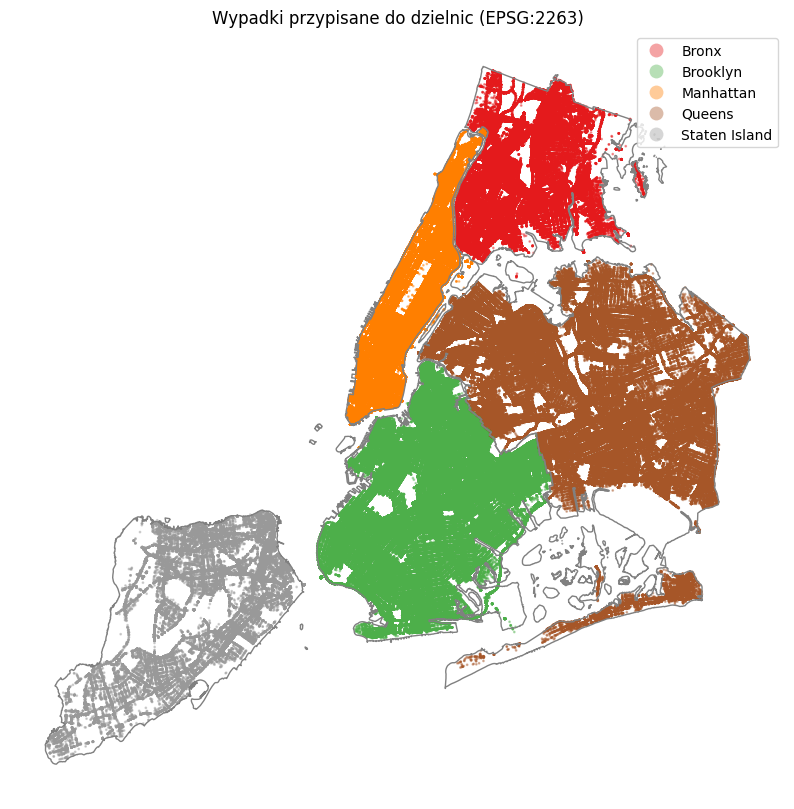

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
Boroughs_gdf.boundary.plot(ax=ax, linewidth=1, edgecolor='gray')
Accidents_cleaned_gdf.plot(
    ax=ax, column='BoroName', cmap='Set1', markersize=1, alpha=0.4, legend=True
)
plt.title("Wypadki przypisane do dzielnic (EPSG:2263)")
plt.axis('off')
plt.show()

#### 2.1.5 Interaktywna mapa miejsc wypadków

In [27]:
# Konwersja CRS do WGS84
Accidents_map_gdf = Accidents_cleaned_gdf.to_crs(epsg=4326)

# Inicjalizacja mapy
Map_nyc = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
Marker_cluster = MarkerCluster().add_to(Map_nyc)

# Dodanie markerów
for _, row in Accidents_map_gdf.sample(1000, random_state=42).iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=f"id:{row['COLLISION_ID']} {row['ACCIDENT DATE']} - {row['BOROUGH']}"
    ).add_to(Marker_cluster)

Map_nyc

#### 2.1.6 Mapa cieplna (HeatMap) lokalizacji miejsc wypadków

Wizualna reprezentacja intensywności wystąpień wypadków na obszarze Nowego Jorku.

In [30]:
# Przygotowanie danych w WGS84
Accidents_heatmap_gdf = Accidents_cleaned_gdf.to_crs(epsg=4326)

# Próbkowanie (np. 5000 punktów)
Heat_data = [[row.geometry.y, row.geometry.x] for _, row in Accidents_heatmap_gdf.sample(5000, random_state=1).iterrows()]

# Inicjalizacja mapy
Map_heat = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Płynny gradient: turkus → niebieski → biały (więcej przedziałów)
HeatMap(
    Heat_data,
    radius=9,
    blur=12,
    gradient={
        0.0: '#00ffff',   # jasny turkus
        0.2: '#33ccff',   # niebieskawy turkus
        0.4: '#3399ff',   # błękit
        0.6: '#3366ff',   # niebieski
        0.8: '#0000ff',   # ciemny niebieski
        0.95: '#b0c4de',  # stalowy niebieski
        1.0: '#ffffff'    # biały
    }
).add_to(Map_heat)

Map_heat

#### 📌 2.1.7 Najczęstsze miejsca wypadków

In [32]:
Top_locations_df = (
    Accidents_cleaned_gdf
    .groupby(['LATITUDE', 'LONGITUDE'])
    .size()
    .reset_index(name='Number_of_Accidents')
    .sort_values(by='Number_of_Accidents', ascending=False)
    .head(10)
)

Top_locations_df

,LATITUDE,LONGITUDE,Number_of_Accidents
18030,40.608757,-74.038086,533
77768,40.696035,-73.984529,443
77765,40.696033,-73.984530,442
148812,40.804700,-73.912430,385
147297,40.798256,-73.827440,377
171534,40.861862,-73.912820,372
133065,40.760601,-73.964314,343
130004,40.757232,-73.989792,334
15598,40.604153,-74.051980,330
59170,40.675736,-73.896853,327


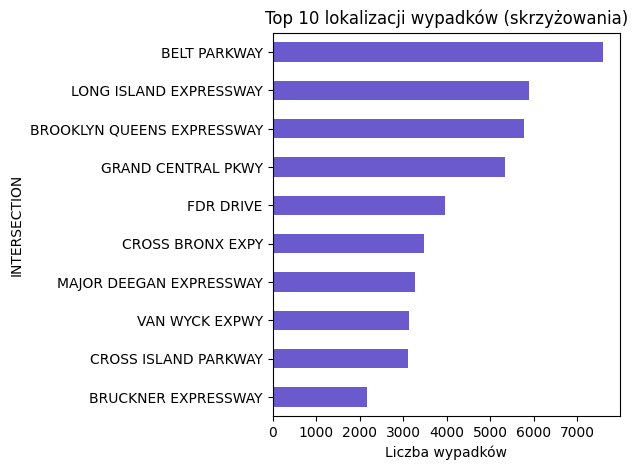

In [33]:
# Łączenie nazw ulic dla lokalizacji skrzyżowań
Accidents_cleaned_gdf['INTERSECTION'] = (
    Accidents_cleaned_gdf['ON STREET NAME'].fillna('') + ' & ' +
    Accidents_cleaned_gdf['CROSS STREET NAME'].fillna('')
).str.strip(' &')

Top_locations_sr = Accidents_cleaned_gdf['INTERSECTION'].value_counts().drop('', errors='ignore').head(10)

# Poziomy wykres słupkowy
Top_locations_sr.plot(kind='barh', color='slateblue', title='Top 10 lokalizacji wypadków (skrzyżowania)')
plt.xlabel('Liczba wypadków')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [34]:
# Mapa miejsc, w których najczęście dochodziło do wypadków

import folium
from folium.plugins import MarkerCluster

# Inicjalizacja mapy
Map_top_locations = folium.Map(location=[40.7128, -74.0060], zoom_start=13)

# Klaster do grupowania markerów (opcjonalnie, dla przejrzystości przy wielu punktach)
marker_cluster = MarkerCluster().add_to(Map_top_locations)

# Ustawienia kolorów w zależności od liczby wypadków
def get_color(count):
    if count >= 100:
        return 'darkred'
    elif count >= 80:
        return 'red'
    elif count >= 60:
        return 'orange'
    else:
        return 'darkblue'

# Dodanie znaczników
for _, row in Top_locations_df.iterrows():
    count = row['Number_of_Accidents']
    color = get_color(count)
    
    folium.CircleMarker(
        location=[row["LATITUDE"], row["LONGITUDE"]],
        radius=5 + (count / 20),  # im więcej wypadków, tym większy znacznik
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8,
        tooltip=f"{count} wypadków\n({row['LATITUDE']:.5f}, {row['LONGITUDE']:.5f})"
    ).add_to(marker_cluster)
    
    # Etykieta tekstowa z liczbą
    folium.map.Marker(
        [row["LATITUDE"], row["LONGITUDE"]],
        icon=folium.DivIcon(html=f"""
            <div style="
                font-size: 9pt;
                color: white;
                background: {color};
                border-radius: 4px;
                padding: 2px 4px;
                text-align: center;
                font-weight: bold;
            ">
                {count}
            </div>
        """)
    ).add_to(Map_top_locations)

Map_top_locations


Liczba wypadków określa kolor, rozmiar oraz etykietę znacznika.

#### 🏘️ 2.1.8 Porównanie dzielnic pod względem liczby wypadków

##### 2.1.8.1. Porównanie wartości bezwzględnych

In [38]:
# Zliczenie liczby wypadków w każdej dzielnicy
Accidents_per_borough_sr = Corrected_data_df["BOROUGH"].value_counts().sort_values(ascending=False)

# Udział procentowy wypadków w dzielnicy w stosunku do liczby wszystkich wypadków w mieście
Accidents_percent_sr = (Accidents_per_borough_sr / Accidents_per_borough_sr.sum() * 100).round(2)

# Połączenie do tabeli (DataFrame)
Accidents_stats_df = pd.DataFrame({
    "NUMBER OF ACCIDENTS": Accidents_per_borough_sr,
    "PERCENT OF TOTAL": Accidents_percent_sr.astype(str) + "%"
})

Accidents_stats_df

,NUMBER OF ACCIDENTS,PERCENT OF TOTAL
BOROUGH,,
BROOKLYN,321860,29.49%
QUEENS,311253,28.51%
MANHATTAN,249032,22.81%
BRONX,155755,14.27%
STATEN ISLAND,53651,4.92%


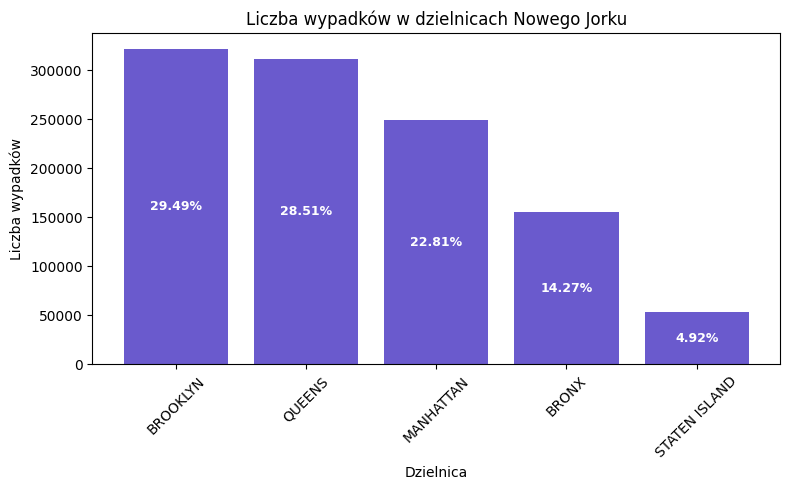

In [39]:
# Wizualizacja statystyki liczby wypadków w podziale na dzielnice

# Styl wykresu
plt.style.use('seaborn-v0_8-muted')

# Wykres słupkowy
plt.figure(figsize=(8, 5))
bars = plt.bar(
    Accidents_stats_df.index,
    Accidents_stats_df["NUMBER OF ACCIDENTS"],
    color='slateblue'
)

# Tytuł i osie
plt.title("Liczba wypadków w dzielnicach Nowego Jorku")
plt.xlabel("Dzielnica")
plt.ylabel("Liczba wypadków")
plt.xticks(rotation=45)

# Dodanie etykiet procentowych wewnątrz słupków
for index, (value, percent) in enumerate(zip(
    Accidents_stats_df["NUMBER OF ACCIDENTS"],
    Accidents_stats_df["PERCENT OF TOTAL"]
)):
    plt.text(
        index,
        value * 0.5,  # pozycja mniej więcej w połowie słupka
        percent,
        ha='center',
        va='center',
        fontsize=9,
        color='white',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

##### 2.1.8.2. Porównanie wartości znormalizowanych względem powierzchni dzielnicy - liczby wypadków na km²

In [41]:
# Znormalizowana liczba wypadków względem powierzchni dzielnic

# 1. Upewnienie się, że kolumna z nazwą dzielnicy w GeoDataFrame zapisana jest wielkimi literami
Boroughs_gdf["BOROUGH"] = Boroughs_gdf["BoroName"].str.upper()

# 2. Przeliczenie powierzchnii z ft² na km² (1 ft² ≈ 0.092903 m², a więc / 1e6 na km²)
Boroughs_gdf["AREA_KM2"] = Boroughs_gdf["Shape_Area"] * 0.092903 / 1_000_000

# 3. Połączenie danych: złączenie DataFrame z powierzchnią i statystykami wypadków
Accidents_with_area_df = Accidents_stats_df.merge(
    Boroughs_gdf[["BOROUGH", "AREA_KM2"]],
    left_index=True,
    right_on="BOROUGH"
)

# 4. Obliczenie liczby wypadków na km²
Accidents_with_area_df["ACCIDENTS PER KM²"] = (
    Accidents_with_area_df["NUMBER OF ACCIDENTS"] / Accidents_with_area_df["AREA_KM2"]
).round(2)

# 5. Posortowanie wyników
Accidents_with_area_df.sort_values("ACCIDENTS PER KM²", ascending=False, inplace=True)

# 6. Wyświetlenie tabeli wynikowej
Accidents_with_area_df[["BOROUGH", "NUMBER OF ACCIDENTS", "AREA_KM2", "ACCIDENTS PER KM²"]].set_index("BOROUGH")


,NUMBER OF ACCIDENTS,AREA_KM2,ACCIDENTS PER KM²
BOROUGH,,,
MANHATTAN,249032,59.146326,4210.44
BROOKLYN,321860,179.687628,1791.22
BRONX,155755,110.292098,1412.20
QUEENS,311253,282.556828,1101.56
STATEN ISLAND,53651,150.839047,355.68


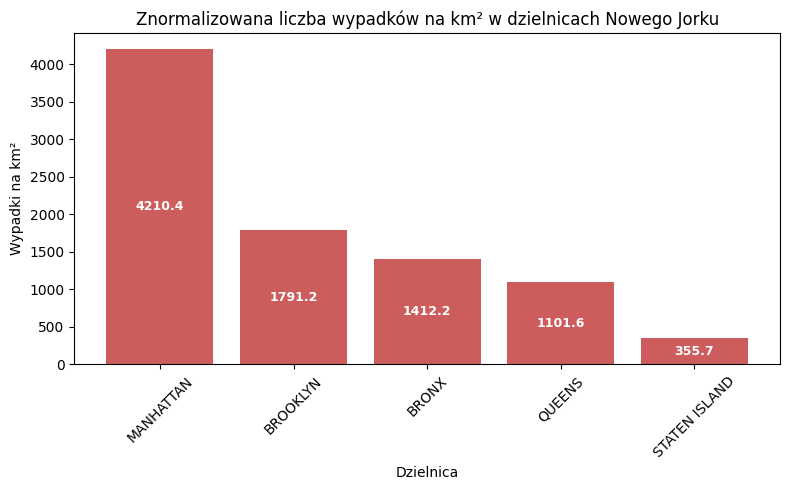

In [42]:
# Wizualizacja statystyki liczby wypadków przypadających na 1 km² w podziale na dzielnice

# Styl
plt.style.use('seaborn-v0_8-muted')

# Wykres słupkowy
plt.figure(figsize=(8, 5))
bars = plt.bar(
    Accidents_with_area_df["BOROUGH"],
    Accidents_with_area_df["ACCIDENTS PER KM²"],
    color='indianred'
)

# Tytuł i osie
plt.title("Znormalizowana liczba wypadków na km² w dzielnicach Nowego Jorku")
plt.xlabel("Dzielnica")
plt.ylabel("Wypadki na km²")
plt.xticks(rotation=45)

# Etykiety wartości wewnątrz słupków
for index, value in enumerate(Accidents_with_area_df["ACCIDENTS PER KM²"]):
    plt.text(
        index,
        value * 0.5,  # połowa wysokości słupka
        f"{value:.1f}",
        ha='center',
        va='center',
        fontsize=9,
        color='white',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


## 🕒 **3. Analiza czasowa wypadków**

---

🕰️ **Podsumowanie**: Analiza czasowa wykazała wyraźne szczyty liczby wypadków w godzinach porannych i popołudniowych, a także zwiększone ryzyko w piątki.

In [44]:
# Zakres dat (od najwcześniejszej do najpóźniejszej)

pd.to_datetime(Corrected_data_df['ACCIDENT DATE'], errors='coerce')

min_date = pd.to_datetime(Corrected_data_df['ACCIDENT DATE'], errors='coerce').min()
max_date = pd.to_datetime(Corrected_data_df['ACCIDENT DATE'], errors='coerce').max()

print(f"Okres, którego dotyczą dane o wypadkach: od {min_date.date()} do {max_date.date()}")

Okres, którego dotyczą dane o wypadkach: od 2012-07-01 do 2019-11-26


### 📆 **3.1. Rozkład tygodniowy i dobowy**

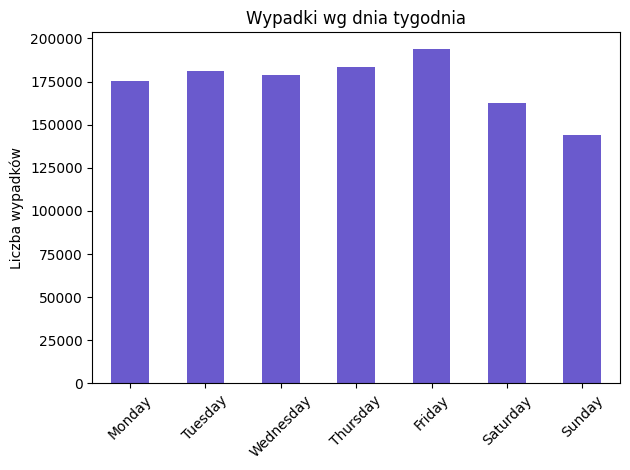

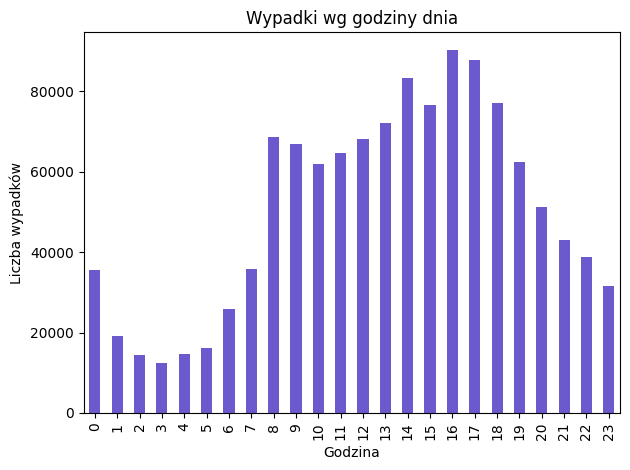

In [46]:
# Konwersja daty i czasu
Corrected_data_df['DATETIME'] = pd.to_datetime(
    Corrected_data_df['ACCIDENT DATE'].astype(str) + ' ' + Corrected_data_df['ACCIDENT TIME'].astype(str),
    errors='coerce'
)

# Ekstrakcja godziny i dnia tygodnia
Corrected_data_df['HOUR'] = Corrected_data_df['DATETIME'].dt.hour
Corrected_data_df['DAY_OF_WEEK'] = Corrected_data_df['DATETIME'].dt.day_name()

# Dni tygodnia (uporządkowane)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Accidents_per_day_sr = Corrected_data_df['DAY_OF_WEEK'].value_counts().reindex(day_order)

# Wykres: dni tygodnia
Accidents_per_day_sr.plot(kind='bar', color='slateblue', title='Wypadki wg dnia tygodnia')
plt.ylabel('Liczba wypadków')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Wykres: godziny
Accidents_per_hour_sr = Corrected_data_df['HOUR'].value_counts().sort_index()
Accidents_per_hour_sr.plot(kind='bar', color='slateblue', title='Wypadki wg godziny dnia')
plt.xlabel('Godzina')
plt.ylabel('Liczba wypadków')
plt.tight_layout()
plt.show()

### 📊 **3.2. Trendy roczne i miesięczne liczby wypadków**

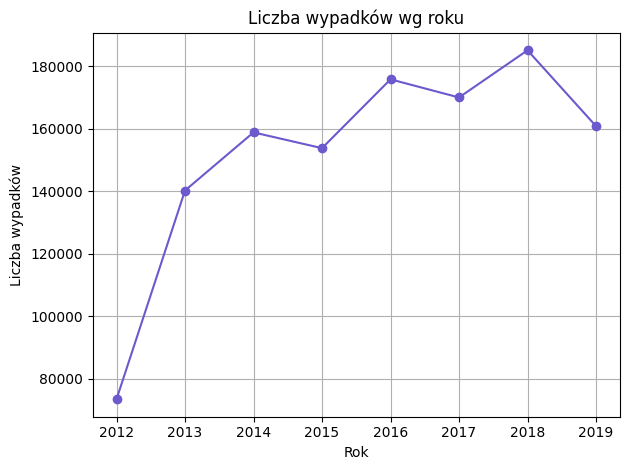

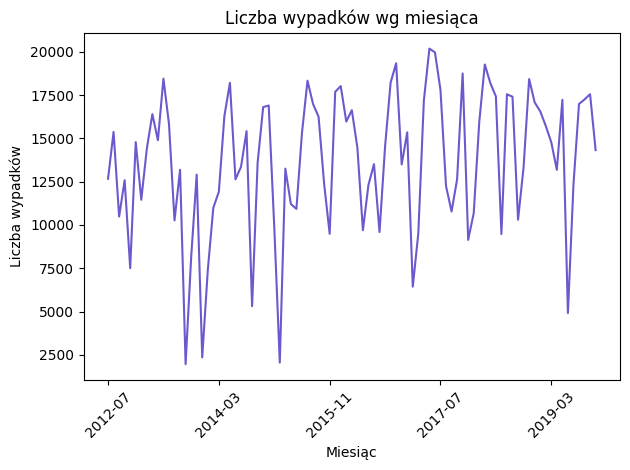

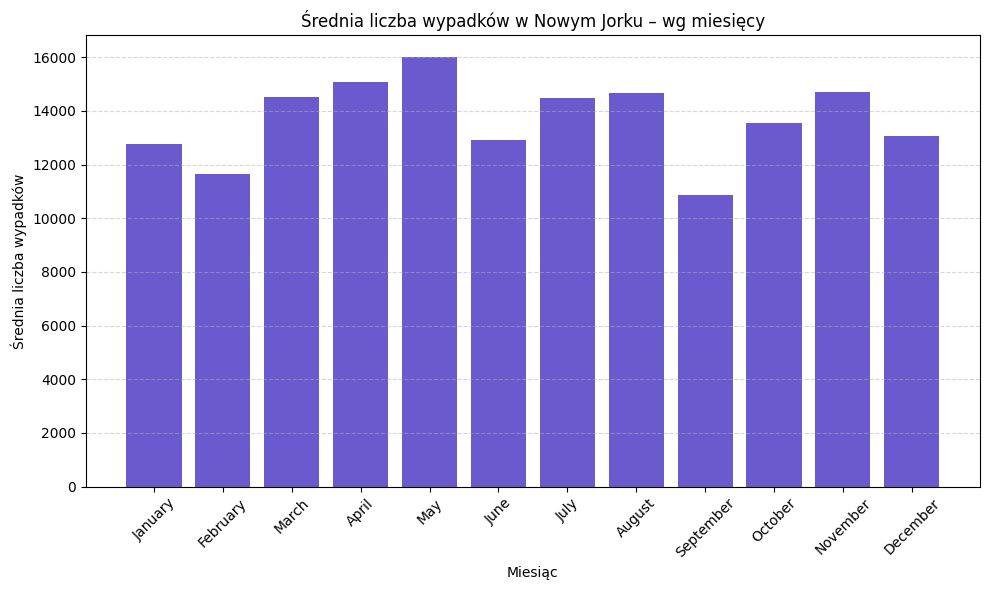

In [48]:
# Konwersja daty i czasu
Corrected_data_df['DATETIME'] = pd.to_datetime(
    Corrected_data_df['ACCIDENT DATE'].astype(str) + ' ' + Corrected_data_df['ACCIDENT TIME'].astype(str),
    errors='coerce'
)

# Trendy roczne
Corrected_data_df['YEAR'] = Corrected_data_df['DATETIME'].dt.year
Accidents_per_year_sr = Corrected_data_df['YEAR'].value_counts().sort_index()
Accidents_per_year_sr.plot(marker='o', color='slateblue', title='Liczba wypadków wg roku')
plt.ylabel('Liczba wypadków')
plt.xlabel('Rok')
plt.grid(True)
plt.tight_layout()
plt.show()

# Trendy miesięczne
Corrected_data_df['MONTH'] = Corrected_data_df['DATETIME'].dt.to_period('M')
Accidents_per_month_sr = Corrected_data_df['MONTH'].value_counts().sort_index()
Accidents_per_month_sr.index = Accidents_per_month_sr.index.astype(str)
Accidents_per_month_sr.plot(color='slateblue', title='Liczba wypadków wg miesiąca')
plt.ylabel('Liczba wypadków')
plt.xlabel('Miesiąc')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Średnia liczba wypadków w ujęciu miesięcznym (niezależnie od roku)
Corrected_data_df["MONTH_NUM"] = Corrected_data_df["DATETIME"].dt.month
Corrected_data_df["MONTH_NAME"] = Corrected_data_df["DATETIME"].dt.month_name()

monthly_counts_df = (
    Corrected_data_df
    .groupby(["YEAR", "MONTH_NUM", "MONTH_NAME"])
    .size()
    .reset_index(name="Accident count")
)

mean_monthly_accidents_df = (
    monthly_counts_df
    .groupby(["MONTH_NUM", "MONTH_NAME"])["Accident count"]
    .mean()
    .round(0)
    .sort_index()
    .reset_index()
)

plt.figure(figsize=(10, 6))
plt.bar(
    mean_monthly_accidents_df["MONTH_NAME"],
    mean_monthly_accidents_df["Accident count"],
    color="slateblue"
)
plt.title("Średnia liczba wypadków w Nowym Jorku – wg miesięcy")
plt.ylabel("Średnia liczba wypadków")
plt.xlabel("Miesiąc")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## 🚗 **4. Analiza typów pojazdów biorących udział w wypadkach**
---

⚠️ **Podsumowanie**: W 2/3 wypadków uczestniczyły pojazdy osobowe, a w 1/4 suwy.

Sekcja obejmuje analizę, jakie typy pojazdów najczęściej brały udział w wypadkach. Dane zostały oczyszczone i skategoryzowane do głównych grup (np. PASSENGER VEHICLE, SUV, TRUCK, itp.). 
Wykres przedstawia liczbę i procentowy udział każdej kategorii.

In [51]:
# Kolumny z typami pojazdów, które uczestniczyły w wypadkach
Vehicle_columns = [
    'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
    'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'
]

In [52]:
print("Liczba unikalnych typów pojazdów w danych:", len(Unique_vehicle_types_sr))

Liczba unikalnych typów pojazdów w danych: 627


In [53]:
# Mapa normalizująca typy pojazdów
Reverse_vehicle_map = {
    # PASSENGER VEHICLE
    "SEDAN": "PASSENGER VEHICLE", "4DSD": "PASSENGER VEHICLE", "TAXI": "PASSENGER VEHICLE",
    "LIVERY": "PASSENGER VEHICLE", "COUPE": "PASSENGER VEHICLE", "CONVERTIBLE": "PASSENGER VEHICLE",
    "HATCHBACK": "PASSENGER VEHICLE", "2 DR SEDAN": "PASSENGER VEHICLE", "4 DR SEDAN"
    "TLC": "PASSENGER VEHICLE", "GOLF": "PASSENGER VEHICLE", "PASSENGER VEHICLE": "PASSENGER VEHICLE",

    # SUV
    "SUV": "SUV", "SPORT UTILITY / STATION WAGON": "SUV", "S.U.V.": "SUV", "S/U V": "SUV",

    # LIGHT TRUCK
    "PICK-UP TRUCK": "LIGHT TRUCK", "PICKUP TRUCK": "LIGHT TRUCK", "PICK UP TRUCK": "LIGHT TRUCK",
    "P/U": "LIGHT TRUCK", "PICK": "LIGHT TRUCK", "PICK-": "LIGHT TRUCK", "PICKU": "LIGHT TRUCK",
    "PK": "LIGHT TRUCK", "PKUP": "LIGHT TRUCK",

    # VAN
    "VAN": "VAN", "CARGO VAN": "VAN", "MINIVAN": "VAN", "MINI VAN": "VAN", "MINIV": "VAN", "LUNCH WAGON": "VAN",
    "C/V": "VAN", "VAN/TRUCK": "VAN", "MINI-VAN": "VAN", "M/V": "VAN","VAN (": "VAN", "VAN A": "VAN", "VAN C": "VAN",
    "VAN CAMPER": "VAN", "VAN F": "VAN", "VAN T": "VAN", "VAN W": "VAN", "VAN/T": "VAN",

    # TRUCK
    "BOX TRUCK": "TRUCK", "TRACTOR TRUCK": "TRUCK", "TRUCK": "TRUCK", "FLATBED": "TRUCK",
    "DUMP": "TRUCK", "MACK": "TRUCK", "MAC T": "TRUCK", "MULTI-WHEELED VEHICLE": "TRUCK",
    "TRACTOR": "TRUCK", "18 WHEELER" "DELIVERY TRUCK": "TRUCK", "BEVERAGE TRUCK": "TRUCK",
    "TRAC": "TRUCK", "TOW TRUCK": "TRUCK", "TOW TRUCK / WRECKER": "TRUCK", "TRAC": "TRUCK",
    "TRAC.": "TRUCK", "TRACK": "TRUCK", "TRACT": "TRUCK", "TRACTOR TRUCK DIESEL": "TRUCK",
    "TRACTOR TRUCK GASOLINE": "TRUCK",

    # BUS
    "BUS": "BUS", "SCHOOL BUS": "BUS", "COMMERCIAL BUS": "BUS", "INTERCITY BUS": "BUS",
    "TOUR BUS": "BUS", "CHARTER BUS": "BUS",

    # MOTORCYCLE
    "MOTORCYCLE": "MOTORCYCLE", "SCOOTER": "MOTORCYCLE", "MOTORSCOOTER": "MOTORCYCLE",
    "MOPED": "MOTORCYCLE", "MO-PE": "MOTORCYCLE", "MOPAD": "MOTORCYCLE", "MOPET": "MOTORCYCLE",
    "MOTORBIKE": "MOTORCYCLE", "E-SCOOTER": "MOTORCYCLE", "MC": "MOTORCYCLE", "M/C": "MOTORCYCLE",

    # BICYCLE
    "BICYCLE": "BICYCLE", "BIKE": "BICYCLE", "E-BIKE": "BICYCLE", "E-BICYCLE": "BICYCLE",
    "MINIBIKE": "BICYCLE", "MINICYCLE" "ELECTRIC BIKE": "BICYCLE", "BICYC"
    "EBIKE": "BICYCLE", "E- BI": "BICYCLE", "E-BIK": "BICYCLE", "E/BIK": "BICYCLE",

    # EMERGENCY
    "AMBULANCE": "EMERGENCY", "FIRE TRUCK": "EMERGENCY", "FIRET": "EMERGENCY",
    "FDNY": "EMERGENCY", "EMERGENCY VEHICLE": "EMERGENCY", "EMS": "EMERGENCY",
    "AMABU": "EMERGENCY", "AMBU": "EMERGENCY", "AMBUL": "EMERGENCY", "ANBUL": "EMERGENCY",

    # OTHER
    "MOTOR HOME": "OTHER", "MOTORIZED HOME": "OTHER", "MAIL": "OTHER", "MTA": "OTHER",
    "NYC D": "OTHER", "NYC M": "OTHER", "LTR": "OTHER", "CEME": "OTHER", "ME/BE": "OTHER",
    "MAN L": "OTHER", "U-HAUL": "OTHER", "UTILITY": "OTHER", "UTILITY TRAILER": "OTHER",
    "POSTAL": "OTHER",

    # Do odfiltrowania
    "UNKNOWN": None, "UNKOWN": None, "": None, "N/A": None, None: None
}

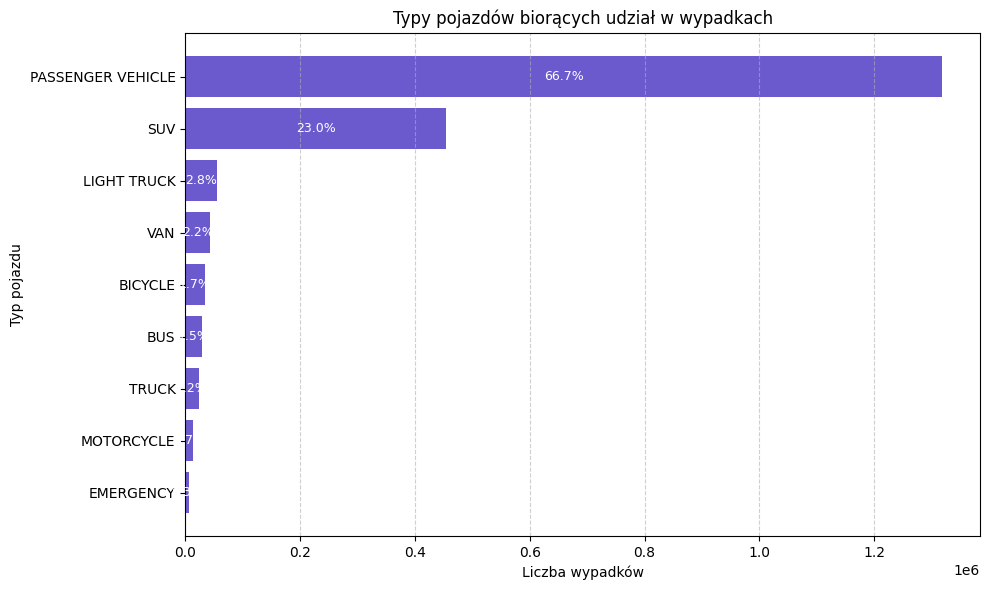

In [54]:
# Lista wartości do odrzucenia
Excluded_values = {
    "", "UNKNOWN", "UNKOWN", "OTHER", "N/A", None,
    "0", "00", "1", "11 PA", "2015", "985", "C/O"
}

# Czyszczenie danych i kategoryzacja
Cleaned_vehicles_sr = pd.concat([
    Corrected_data_df[col]
    .dropna()
    .str.upper()
    .map(Reverse_vehicle_map)
    for col in Vehicle_columns
])

# Filtrowanie nieistotnych
Cleaned_vehicles_sr = Cleaned_vehicles_sr[~Cleaned_vehicles_sr.isin(Excluded_values)]

# Zliczenie i procenty
Vehicle_counts_sr = Cleaned_vehicles_sr.value_counts()
Vehicle_percentages_sr = (Vehicle_counts_sr / Vehicle_counts_sr.sum() * 100).round(1)

# Wykres słupkowy z procentami wewnątrz
plt.figure(figsize=(10, 6))
bars = plt.barh(
    Vehicle_counts_sr.index[::-1],
    Vehicle_counts_sr.values[::-1],
    color='slateblue'
)

# Dodanie etykiet procentowych do środka słupków
for bar, percent in zip(bars, Vehicle_percentages_sr.values[::-1]):
    width = bar.get_width()
    plt.text(width / 2, bar.get_y() + bar.get_height() / 2,
             f"{percent:.1f}%", ha='center', va='center', color='white', fontsize=9)

plt.title("Typy pojazdów biorących udział w wypadkach")
plt.xlabel("Liczba wypadków")
plt.ylabel("Typ pojazdu")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## ⚠️ **5. Analiza przyczyn i skutków wypadków**

---

⚠️ **Podsumowanie**: Nieuwaga kierowców i nieprzestrzeganie przepisów to dominujące przyczyny wypadków, z dużym udziałem ofiar.

### 📄 **5.1 Wszystkie przyczyny wypadków występujące w danych**

In [57]:
# Ramka danych z przyczynami wypadków
Accidents_factors_df  = Corrected_data_df[["BOROUGH",#"COLLISION_ID",
                                          "CONTRIBUTING FACTOR VEHICLE 1",
                                          "CONTRIBUTING FACTOR VEHICLE 2",
                                          "CONTRIBUTING FACTOR VEHICLE 3",
                                          "CONTRIBUTING FACTOR VEHICLE 4",
                                          "CONTRIBUTING FACTOR VEHICLE 5"
                                         ]]
Accidents_factors_df.head(3)

,BOROUGH,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5
0,QUEENS,Passing Too Closely,Unspecified,None,None,None
1,BROOKLYN,Passing Too Closely,Unspecified,None,None,None
2,MANHATTAN,Driver Inattention/Distraction,None,None,None,None


In [58]:
# Ujednolicenie pustych wartości
Accidents_factors_df = Accidents_factors_df.fillna('-')

In [59]:
Accidents_factors_df.head(3)

,BOROUGH,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5
0,QUEENS,Passing Too Closely,Unspecified,-,-,-
1,BROOKLYN,Passing Too Closely,Unspecified,-,-,-
2,MANHATTAN,Driver Inattention/Distraction,-,-,-,-


In [60]:
# Utworzenie jednej serii danych z liczbą wypadków dla każdej przyczyny
Accidents_factors_sr = pd.concat([Accidents_factors_df['CONTRIBUTING FACTOR VEHICLE 1'],
                                 Accidents_factors_df['CONTRIBUTING FACTOR VEHICLE 2'],
                                 Accidents_factors_df['CONTRIBUTING FACTOR VEHICLE 3'],
                                 Accidents_factors_df['CONTRIBUTING FACTOR VEHICLE 4'],
                                 Accidents_factors_df['CONTRIBUTING FACTOR VEHICLE 5']
                                ], axis=0, ignore_index=True)

In [61]:
Accidents_factors_sr.shape

(6089785,)

In [62]:
Accidents_factors_sr.head()

0               Passing Too Closely
1               Passing Too Closely
2    Driver Inattention/Distraction
3                       Unspecified
4    Driver Inattention/Distraction
dtype: object

In [63]:
# Sprawdzenie czy nie ma brakujących danych
Accidents_factors_sr.isnull().sum()

np.int64(0)

In [64]:
# Liczba przyczyn wypadków
len(Accidents_factors_sr.unique())

57

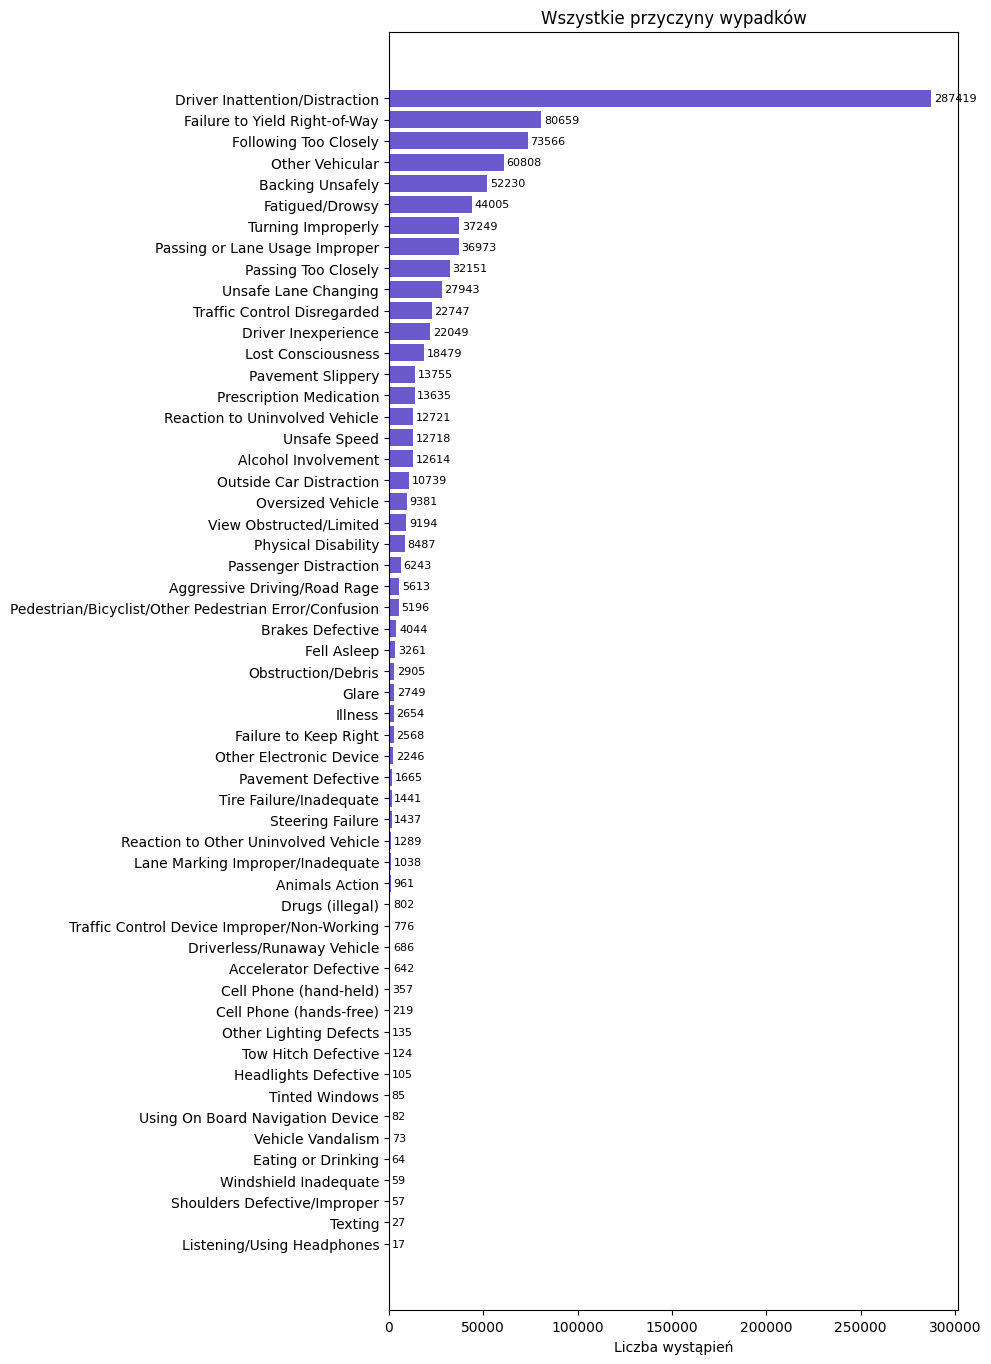

In [65]:
import matplotlib.pyplot as plt

# Usunięcie nieokreślonych wartości
filtered_factors_sr = Accidents_factors_sr[
    ~Accidents_factors_sr.str.upper().isin(['UNSPECIFIED', '-'])
]

# Zliczenie i odwrócenie kolejności
accident_factors_count_sr = filtered_factors_sr.value_counts().iloc[::-1]

# Rozmiar wykresu zależny od liczby kategorii
num_categories = len(accident_factors_count_sr)
plt.figure(figsize=(10, max(6, num_categories * 0.25)))

# Wykres słupkowy poziomy
bars = plt.barh(
    accident_factors_count_sr.index,
    accident_factors_count_sr.values,
    color='slateblue'
)

# Dodanie etykiet liczbowych
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(accident_factors_count_sr.values) * 0.005,
             bar.get_y() + bar.get_height() / 2,
             f'{int(width)}',
             va='center', fontsize=8)

# Podpisy i formatowanie
plt.xlabel("Liczba wystąpień")
plt.title("Wszystkie przyczyny wypadków")
plt.tight_layout()
plt.show()

### 🧷 **5.2 Kategorie wypadków**

In [67]:
# Utworzenie ramki danych na przyczyny wypadków
Category_of_accident_factors_df = Accidents_factors_sr.value_counts(dropna = False).to_frame("Number of occurrences").reset_index(names = "Factor")
Category_of_accident_factors_df.head()

,Factor,Number of occurrences
0,-,3722166
1,Unspecified,1418477
2,Driver Inattention/Distraction,287419
3,Failure to Yield Right-of-Way,80659
4,Following Too Closely,73566


In [68]:
# Dodanie kolumny na zbiorcze kategorie przyczyn wypadków
Category_of_accident_factors_df.insert(loc=0, column="Category", value="")

#### 5.2.1 Nieokreślone przyczyny wypadków

In [70]:
unspecified_ls = ["Unspecified", "-", "1", "80"] # po czyszczeniu danych powinny zostać tylko "Unspecified" i "-"
Category_of_accident_factors_df[Category_of_accident_factors_df["Factor"].isin(unspecified_ls)]

,Category,Factor,Number of occurrences
0,,-,3722166
1,,Unspecified,1418477


In [71]:
# połączenie wartości oznaczonych jako brak (-) z wartościami nieokreślonymi ("Unspecified") w jedną kategorię "Unspecified"
Category_of_accident_factors_df.loc[Category_of_accident_factors_df["Factor"].isin(["Unspecified", "-"]), "Category"] = "Unspecified"
Category_of_accident_factors_df[Category_of_accident_factors_df["Factor"].isin(["Unspecified", "-"])]

,Category,Factor,Number of occurrences
0,Unspecified,-,3722166
1,Unspecified,Unspecified,1418477


#### 5.2.2 Przyczyny leżące po stronie kierowcy

In [73]:
# Lista przyczyn leżących po stronie kierowcy
driver_ls = ['Passing Too Closely', 'Driver Inattention/Distraction','Unsafe Speed', 'Reaction to Uninvolved Vehicle', 'Following Too Closely',
             'Passing or Lane Usage Improper', 'Unsafe Lane Changing', 'Aggressive Driving/Road Rage', 'Turning Improperly',
             'Failure to Yield Right-of-Way', 'Backing Unsafely', 'Drugs (illegal)', 'Drugs (Illegal)', 'Traffic Control Disregarded',
             'Failure to Keep Right', 'Alcohol Involvement', 'Driver Inexperience', 'Using On Board Navigation Device', 'Lost Consciousness',
             'Fatigued/Drowsy', 'Illnes', 'Fell Asleep', 'Physical Disability', 'Prescription Medication', 'Cell Phone (hand-Held)',
             'Cell Phone (hand-held)', 'Cell Phone (hands-free)', 'Listening/Using Headphones', 'Other Electronic Device', 'Eating or Drinking',
             'Texting', 'Illness']
# Liczba przyczyn w kategorii
print("Liczba przyczyn wypadków leżących po stronie kierowcy:", len(driver_ls))

Liczba przyczyn wypadków leżących po stronie kierowcy: 32


In [74]:
# Uzupełnienei kolumny z kategorią
Category_of_accident_factors_df.loc[Category_of_accident_factors_df["Factor"].isin(driver_ls), "Category"] = "Driver"
Category_of_accident_factors_df[Category_of_accident_factors_df["Factor"].isin(driver_ls)]

,Category,Factor,Number of occurrences
2,Driver,Driver Inattention/Distraction,287419
3,Driver,Failure to Yield Right-of-Way,80659
4,Driver,Following Too Closely,73566
6,Driver,Backing Unsafely,52230
7,Driver,Fatigued/Drowsy,44005
8,Driver,Turning Improperly,37249
9,Driver,Passing or Lane Usage Improper,36973
10,Driver,Passing Too Closely,32151
11,Driver,Unsafe Lane Changing,27943
12,Driver,Traffic Control Disregarded,22747


#### 5.2.3 Stan pojazdu

In [76]:
# Lista przyczyn związanych ze stanem pojazdu
vehicle_ls = ['Driverless/Runaway Vehicle', 'Brakes Defective', 'Tire Failure/Inadequate', 'Oversized Vehicle', 'Steering Failure',
              'Accelerator Defective', 'Tow Hitch Defective', 'Vehicle Vandalism', 'Tinted Windows', 'Windshield Inadequate', 'Headlights Defective']
# Liczba przyczyn w kategorii
print("Liczba przyczyn wypadków wynikających ze stanu pojazdu:", len(vehicle_ls))

Liczba przyczyn wypadków wynikających ze stanu pojazdu: 11


In [77]:
# Uzupełnienei kolumny z kategorią
Category_of_accident_factors_df.loc[Category_of_accident_factors_df["Factor"].isin(vehicle_ls), "Category"] = "Vehicle"
Category_of_accident_factors_df[Category_of_accident_factors_df["Factor"].isin(vehicle_ls)]

,Category,Factor,Number of occurrences
21,Vehicle,Oversized Vehicle,9381
27,Vehicle,Brakes Defective,4044
35,Vehicle,Tire Failure/Inadequate,1441
36,Vehicle,Steering Failure,1437
42,Vehicle,Driverless/Runaway Vehicle,686
43,Vehicle,Accelerator Defective,642
47,Vehicle,Tow Hitch Defective,124
48,Vehicle,Headlights Defective,105
49,Vehicle,Tinted Windows,85
51,Vehicle,Vehicle Vandalism,73


#### 5.2.4 Stan ulicy i pasa drogowego

In [79]:
# Lista przyczyn związanych ze stanem uliczy i pasa drogowego
street_ls = ['View Obstructed/Limited', 'Pavement Defective', 'Lane Marking Improper/Inadequate', 'Obstruction/Debris', 'Pavement Slippery',
             'Other Lighting Defects', 'Traffic Control Device Improper/Non-Working', 'Shoulders Defective/Improper']
# Liczba przyczyn w kategorii
print("Liczba przyczyn wypadków wynikających ze stanu drogi:", len(street_ls))

Liczba przyczyn wypadków wynikających ze stanu drogi: 8


In [80]:
# Uzupełnienie kolumny z kategorią
Category_of_accident_factors_df.loc[Category_of_accident_factors_df["Factor"].isin(street_ls), "Category"] = "Street"
Category_of_accident_factors_df[Category_of_accident_factors_df["Factor"].isin(street_ls)]

,Category,Factor,Number of occurrences
15,Street,Pavement Slippery,13755
22,Street,View Obstructed/Limited,9194
29,Street,Obstruction/Debris,2905
34,Street,Pavement Defective,1665
38,Street,Lane Marking Improper/Inadequate,1038
41,Street,Traffic Control Device Improper/Non-Working,776
46,Street,Other Lighting Defects,135
54,Street,Shoulders Defective/Improper,57


#### 5.2.5 Inne czynniki zewnętrzne, niezależne od kierowcy, pojazdu i ulicy

In [82]:
# Lista przyczyn zewnętrznych
external_ls = ['Other Vehicular', 'Outside Car Distraction', 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion', 'Passenger Distraction',
               'Glare', 'Animals Action', 'Reaction to Other Uninvolved Vehicle']
# Liczba przyczyn w kategorii
print("Liczba zewnętrznych przyczyn wypadków, niezależnych od kierowcy:", len(external_ls))

Liczba zewnętrznych przyczyn wypadków, niezależnych od kierowcy: 7


In [83]:
# Uzupełnienie kolumny z kategorią
Category_of_accident_factors_df.loc[Category_of_accident_factors_df["Factor"].isin(external_ls), "Category"] = "External"
Category_of_accident_factors_df[Category_of_accident_factors_df["Factor"].isin(external_ls)]

,Category,Factor,Number of occurrences
5,External,Other Vehicular,60808
20,External,Outside Car Distraction,10739
24,External,Passenger Distraction,6243
26,External,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,5196
30,External,Glare,2749
37,External,Reaction to Other Uninvolved Vehicle,1289
39,External,Animals Action,961


#### 5.2.6 Wystąpienia przyczyn wypadków w podziale na kategorie

In [85]:
# Sumowanie wypadków wg kategorii
Total_accidents_for_the_category_df = (
    Category_of_accident_factors_df
    .groupby("Category")["Number of occurrences"]
    .sum()
    .sort_values(ascending=False)
    .to_frame()
)

# Usunięcie kategorii 'Unspecified'
Total_accidents_for_the_category_df = Total_accidents_for_the_category_df[
    Total_accidents_for_the_category_df.index != "Unspecified"
]

# Obliczenie udziału procentowego
total = Total_accidents_for_the_category_df["Number of occurrences"].sum()
Total_accidents_for_the_category_df["PERCENT"] = (
    (Total_accidents_for_the_category_df["Number of occurrences"] / total) * 100
).round(1)

Total_accidents_for_the_category_df

,Number of occurrences,PERCENT
Category,,
Driver,813555,85.7
External,87985,9.3
Street,29525,3.1
Vehicle,18077,1.9


**Znaczenie kategorii:**
* Driver - przyczyny leżące po stronie kierowcy
* External - przyczyny zewnętrzne
* Street - przyczyny wynikające ze stanu ulicy i pasa drogowego
* Vehicle - przyczyny wynikające ze stanu pojazdu

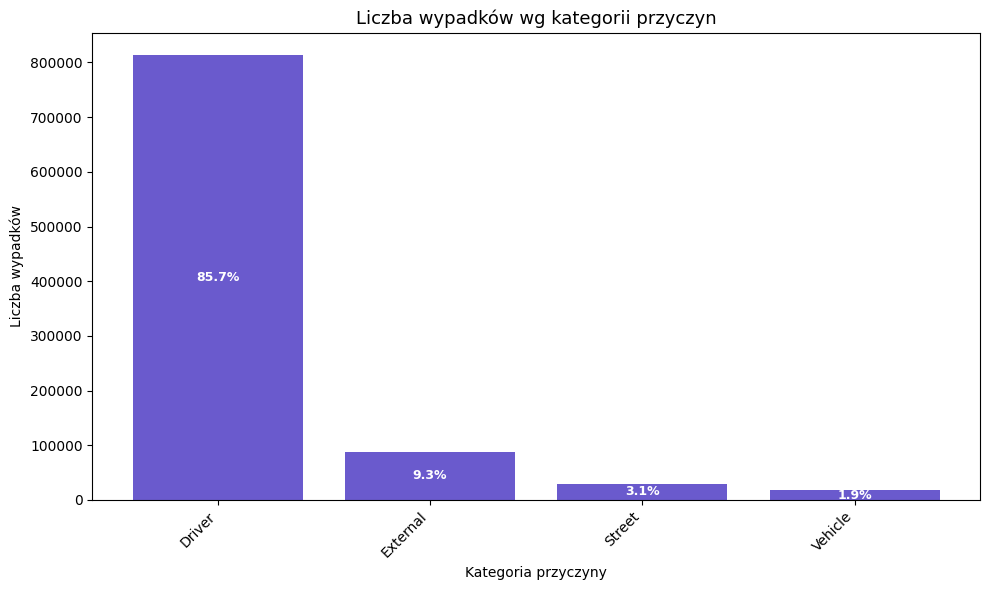

In [87]:
# Wykres słupkowy (pionowy) wizualizujący statystykę odnotowanych przyczyn wypadków w podziale na kategorie zbiorcze
plt.figure(figsize=(10, 6))
bars = plt.bar(
    Total_accidents_for_the_category_df.index,
    Total_accidents_for_the_category_df["Number of occurrences"],
    color='slateblue'
)

# Dodanie wartości procentowych do wnętrza słupków
for bar, percent in zip(bars, Total_accidents_for_the_category_df["PERCENT"]):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,  # umieszczone w środku słupka
        f"{percent}%",
        ha='center',
        va='center',
        color='white',
        fontsize=9,
        fontweight='bold'
    )

# Ustawienia wykresu
plt.title("Liczba wypadków wg kategorii przyczyn", fontsize=13)
plt.xlabel("Kategoria przyczyny")
plt.ylabel("Liczba wypadków")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### 5.2.7 Lista przyczyn wypadków w podziale na kategorie

In [89]:
# Filtrowanie – bez kategorii 'Unspecified'
Filtered_df = Category_of_accident_factors_df[Category_of_accident_factors_df["Category"] != "Unspecified"].copy()

# Suma wystąpień w każdej kategorii (dla filtrowanych danych)
category_totals_sr = Filtered_df.groupby("Category")["Number of occurrences"].transform("sum")

# Całkowita liczba wszystkich wystąpień (bez 'Unspecified')
total_occurrences = Filtered_df["Number of occurrences"].sum()

# Procent w ramach kategorii
Filtered_df["PERCENT_IN_CATEGORY"] = (
    (Filtered_df["Number of occurrences"] / category_totals_sr) * 100
).round(1)

# Procent w całkowitej liczbie
Filtered_df["PERCENT_TOTAL"] = (
    (Filtered_df["Number of occurrences"] / total_occurrences) * 100
).round(1)

# Filtrowanie – bez kategorii 'Unspecified'
Filtered_df = Category_of_accident_factors_df[Category_of_accident_factors_df["Category"] != "Unspecified"].copy()

# Suma wystąpień w każdej kategorii (dla filtrowanych danych)
category_totals_sr = Filtered_df.groupby("Category")["Number of occurrences"].transform("sum")

# Całkowita liczba wszystkich wystąpień (bez 'Unspecified')
total_occurrences = Filtered_df["Number of occurrences"].sum()

# Procent w ramach kategorii
Filtered_df["PERCENT_IN_CATEGORY"] = (
    (Filtered_df["Number of occurrences"] / category_totals_sr) * 100
).round(1)

# Procent w całkowitej liczbie
Filtered_df["PERCENT_TOTAL"] = (
    (Filtered_df["Number of occurrences"] / total_occurrences) * 100
).round(1)
Filtered_df

,Category,Factor,Number of occurrences,PERCENT_IN_CATEGORY,PERCENT_TOTAL
2,Driver,Driver Inattention/Distraction,287419,35.3,30.3
3,Driver,Failure to Yield Right-of-Way,80659,9.9,8.5
4,Driver,Following Too Closely,73566,9.0,7.8
5,External,Other Vehicular,60808,69.1,6.4
6,Driver,Backing Unsafely,52230,6.4,5.5
7,Driver,Fatigued/Drowsy,44005,5.4,4.6
8,Driver,Turning Improperly,37249,4.6,3.9
9,Driver,Passing or Lane Usage Improper,36973,4.5,3.9
10,Driver,Passing Too Closely,32151,4.0,3.4
11,Driver,Unsafe Lane Changing,27943,3.4,2.9


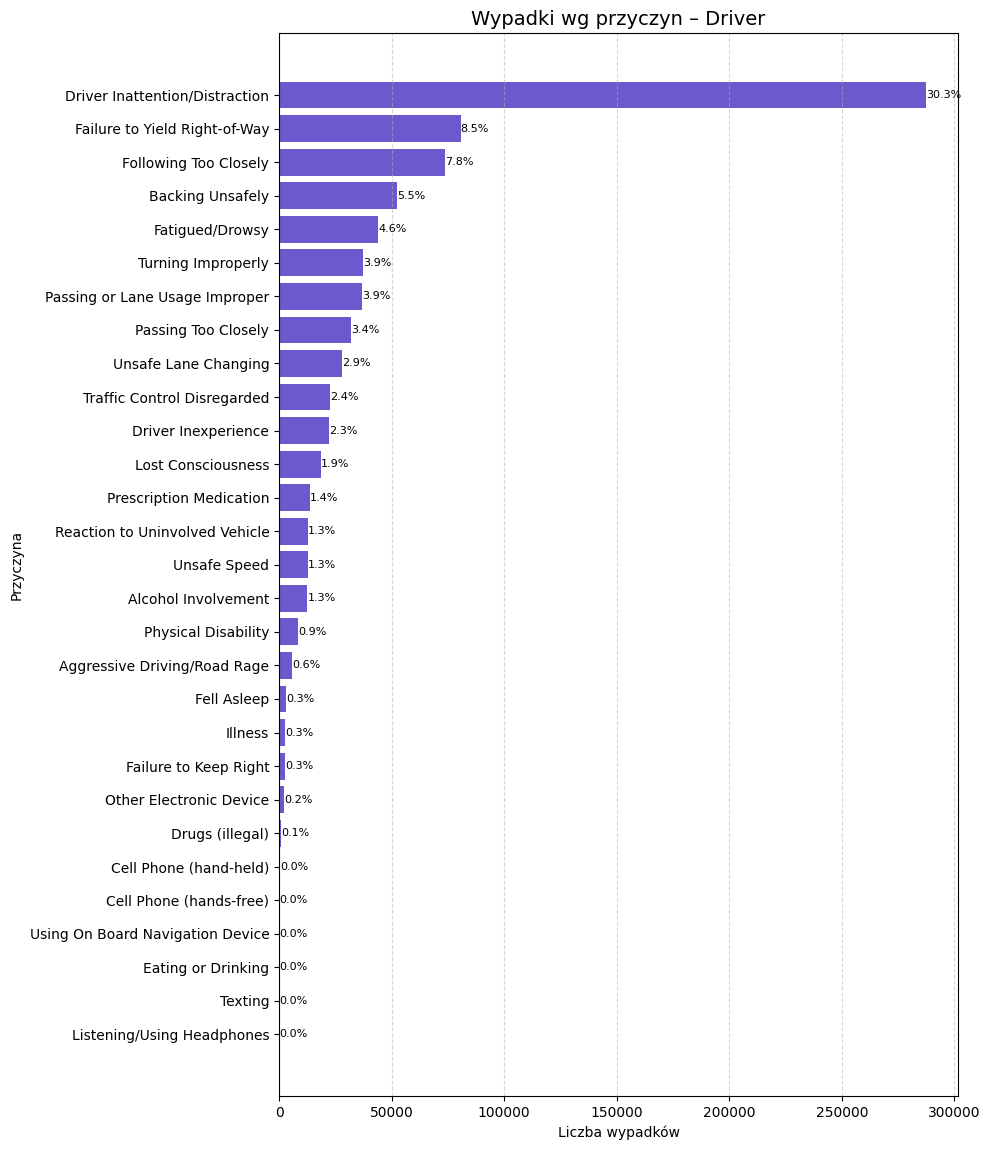

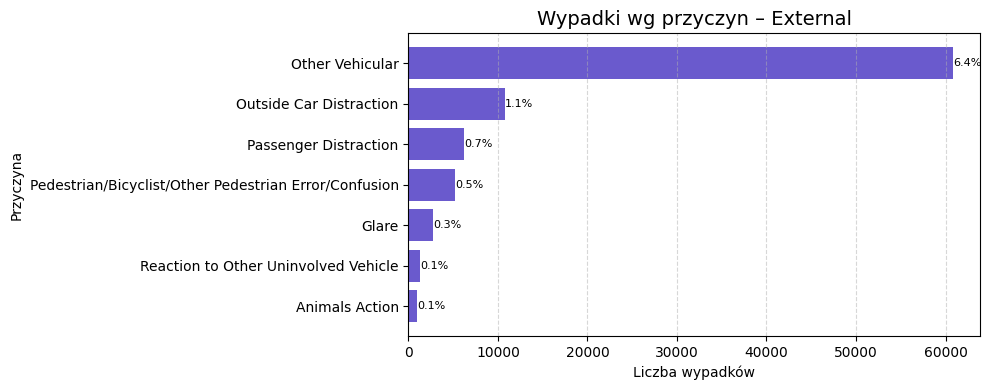

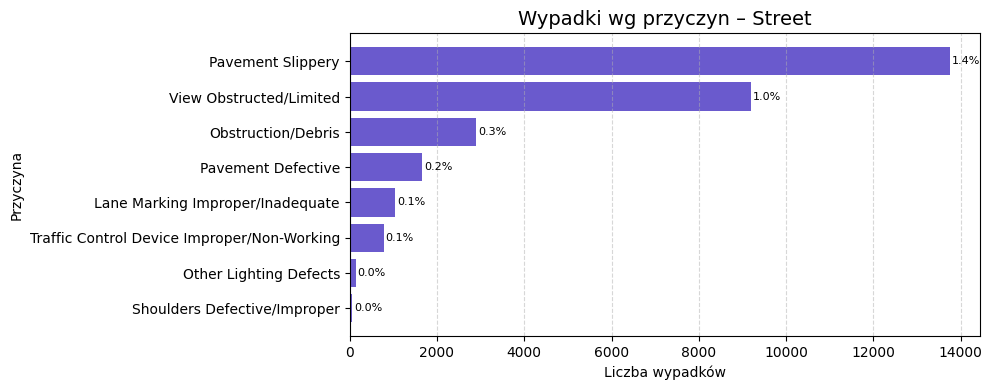

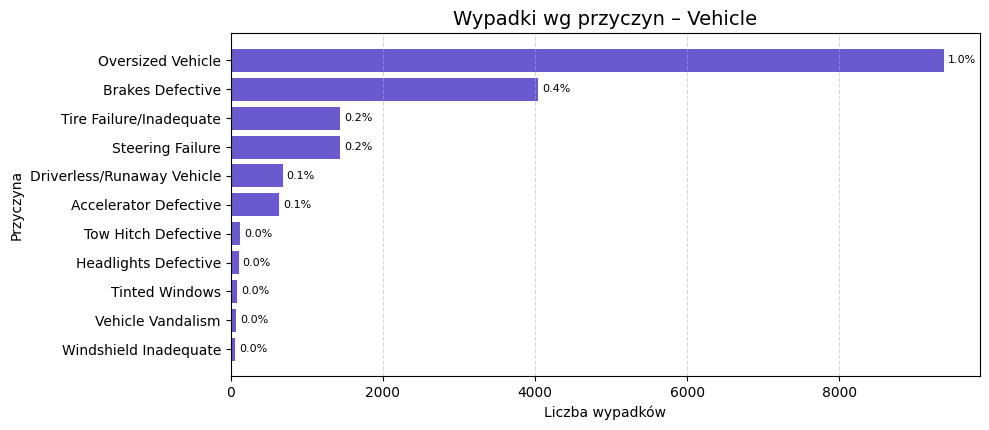

In [90]:
# Wykres dla przyczyn leżących po stronie kierowcy

# Iteracja po unikalnych kategoriach
for category in Filtered_df["Category"].unique():
    # Filtr danych dla danej kategorii
    Subset_df = Filtered_df[Filtered_df["Category"] == category].copy()
    Subset_df.sort_values("Number of occurrences", ascending=True, inplace=True)

    # Tworzenie wykresu
    plt.figure(figsize=(10, max(4, 0.4 * len(Subset_df))))
    bars = plt.barh(
        Subset_df["Factor"],
        Subset_df["Number of occurrences"],
        color="slateblue"
    )

    # Dodanie etykiet procentowych
    for bar, percent in zip(bars, Subset_df["PERCENT_TOTAL"]):
        plt.text(
            bar.get_width() + 50,
            bar.get_y() + bar.get_height() / 2,
            f"{percent:.1f}%",
            va="center",
            fontsize=8
        )

    # Tytuł i opisy
    plt.title(f"Wypadki wg przyczyn – {category}", fontsize=14)
    plt.xlabel("Liczba wypadków")
    plt.ylabel("Przyczyna")
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()

    # Wyświetlenie wykresu
    plt.show()


### 💥 **5.3 Skutki wypadków**

Przygotowanie danych do dalszych analiz dotyczących liczby ofiar wypadków spowodowanych wskazanymi przyczynami

In [93]:
# Połączenie danych o zabitych ze wszystkich (pięciu) kolumn określających przyczyny leżące po stronie pierwszego, drugiego itd. aż do piątego pojazdu
Factors_df_1 = Corrected_data_df[["BOROUGH", "CONTRIBUTING FACTOR VEHICLE 1", "NUMBER OF PERSONS KILLED", "NUMBER OF PERSONS INJURED"]].dropna()
Factors_df_1.columns = ["BOROUGH", "CONTRIBUTING FACTOR VEHICLE", "NUMBER OF PERSONS KILLED", "NUMBER OF PERSONS INJURED"]

Factors_df_2 = Corrected_data_df[["BOROUGH", "CONTRIBUTING FACTOR VEHICLE 2", "NUMBER OF PERSONS KILLED", "NUMBER OF PERSONS INJURED"]].dropna()
Factors_df_2.columns = ["BOROUGH", "CONTRIBUTING FACTOR VEHICLE", "NUMBER OF PERSONS KILLED", "NUMBER OF PERSONS INJURED"]

Factors_df_3 = Corrected_data_df[["BOROUGH", "CONTRIBUTING FACTOR VEHICLE 3", "NUMBER OF PERSONS KILLED", "NUMBER OF PERSONS INJURED"]].dropna()
Factors_df_3.columns = ["BOROUGH", "CONTRIBUTING FACTOR VEHICLE", "NUMBER OF PERSONS KILLED", "NUMBER OF PERSONS INJURED"]

Factors_df_4 = Corrected_data_df[["BOROUGH", "CONTRIBUTING FACTOR VEHICLE 4", "NUMBER OF PERSONS KILLED", "NUMBER OF PERSONS INJURED"]].dropna()
Factors_df_4.columns = ["BOROUGH", "CONTRIBUTING FACTOR VEHICLE", "NUMBER OF PERSONS KILLED", "NUMBER OF PERSONS INJURED"]

Factors_df_5 = Corrected_data_df[["BOROUGH", "CONTRIBUTING FACTOR VEHICLE 5", "NUMBER OF PERSONS KILLED", "NUMBER OF PERSONS INJURED"]].dropna()
Factors_df_5.columns = ["BOROUGH", "CONTRIBUTING FACTOR VEHICLE", "NUMBER OF PERSONS KILLED", "NUMBER OF PERSONS INJURED"]

# Połączenie danych z wszystkich kolumn
Factors_df = pd.concat([Factors_df_1,Factors_df_2,Factors_df_3,Factors_df_4,Factors_df_5], ignore_index=True, axis=0)

# Zamiana typu danych na liczby całkowite
Factors_df["NUMBER OF PERSONS KILLED"] = pd.to_numeric(Factors_df["NUMBER OF PERSONS KILLED"], errors='coerce').astype('Int64') # int
Factors_df["NUMBER OF PERSONS INJURED"] = pd.to_numeric(Factors_df["NUMBER OF PERSONS INJURED"], errors='coerce').astype('Int64') # int

# Tylko wypadki, dla których określono przyczynę - nie jest brana pod uwagę wartość Unspecified dla przyczyn wypadków
Factors_df = Factors_df[Factors_df["CONTRIBUTING FACTOR VEHICLE"] != "Unspecified"]

Factors_df.sort_values(["NUMBER OF PERSONS KILLED", "NUMBER OF PERSONS INJURED"], ascending = [False, False]).head()

,BOROUGH,CONTRIBUTING FACTOR VEHICLE,NUMBER OF PERSONS KILLED,NUMBER OF PERSONS INJURED
386874,MANHATTAN,Other Vehicular,8,12
502456,QUEENS,Traffic Control Disregarded,5,3
421611,QUEENS,Unsafe Speed,4,15
1020613,QUEENS,Driver Inexperience,4,1
591824,STATEN ISLAND,Unsafe Speed,3,9


### 🔁 **5.4 Najczęstsze przyczyny wypadków**

#### 5.4.1 Trzy najczęstsze przyczyny wypadków w Nowym Jorku

In [96]:
# Trzy najczęstsze przyczyny wypadków w całym mieście
Category_of_accident_factors_df.loc[Category_of_accident_factors_df["Category"] !=
"Unspecified"].sort_values("Number of occurrences", ascending = False).head(3).reset_index(drop=True).set_index("Factor")

,Category,Number of occurrences
Factor,,
Driver Inattention/Distraction,Driver,287419
Failure to Yield Right-of-Way,Driver,80659
Following Too Closely,Driver,73566


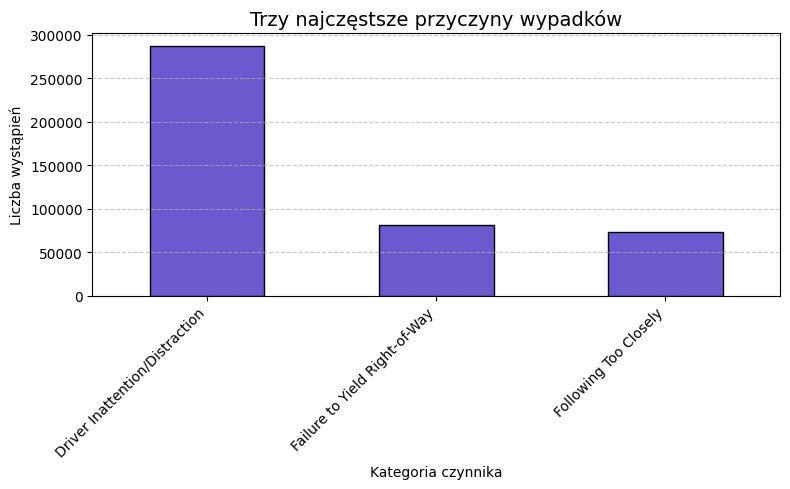

In [196]:
import matplotlib.pyplot as plt

# Przygotowanie danych: top 3 kategorie (bez "Unspecified"), sortowane malejąco
top3_factors_df = (
    Category_of_accident_factors_df
    .loc[Category_of_accident_factors_df["Category"] != "Unspecified"]
    .sort_values("Number of occurrences", ascending=False)
    .head(3)
    .reset_index(drop=True)
    .set_index("Factor")
)

# Wykres
plt.figure(figsize=(8, 5))
top3_factors_df["Number of occurrences"].plot(
    kind='bar',
    color='slateblue',
    edgecolor='black'
)

plt.title("Trzy najczęstsze przyczyny wypadków", fontsize=14)
plt.ylabel("Liczba wystąpień")
plt.xlabel("Kategoria czynnika")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [98]:
Category_of_accident_factors_df

,Category,Factor,Number of occurrences
0,Unspecified,-,3722166
1,Unspecified,Unspecified,1418477
2,Driver,Driver Inattention/Distraction,287419
3,Driver,Failure to Yield Right-of-Way,80659
4,Driver,Following Too Closely,73566
5,External,Other Vehicular,60808
6,Driver,Backing Unsafely,52230
7,Driver,Fatigued/Drowsy,44005
8,Driver,Turning Improperly,37249
9,Driver,Passing or Lane Usage Improper,36973


#### 5.4.2 Trzy najczęstsze przyczyny wypadków w każdej z dzielnic Nowego Jorku

In [100]:
# Trzy najczęstsze przyczyny wypadków w podziale na dzielnice
Top_3_factors_in_borough_df = Factors_df.groupby(["BOROUGH", "CONTRIBUTING FACTOR VEHICLE"]).size().reset_index(name="COUNT OF ACCIDENTS").sort_values(["BOROUGH", "COUNT OF ACCIDENTS"], ascending=[True, False]).groupby('BOROUGH').head(3)
Top_3_factors_in_borough_df.set_index("BOROUGH")

,CONTRIBUTING FACTOR VEHICLE,COUNT OF ACCIDENTS
BOROUGH,,
BRONX,Driver Inattention/Distraction,31559
BRONX,Other Vehicular,10563
BRONX,Following Too Closely,9861
BROOKLYN,Driver Inattention/Distraction,65382
BROOKLYN,Failure to Yield Right-of-Way,22954
BROOKLYN,Following Too Closely,16542
MANHATTAN,Driver Inattention/Distraction,69893
MANHATTAN,Other Vehicular,24233
MANHATTAN,Following Too Closely,13560


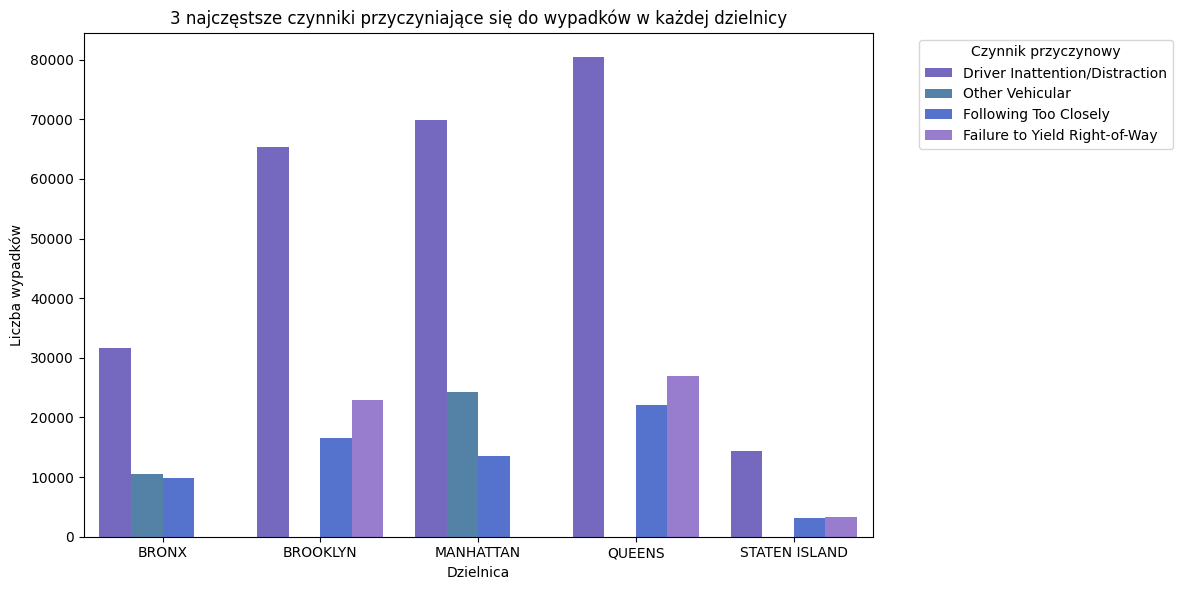

In [101]:
# Wizualizacja 3 najczęstszych przyczyn wypadków w podziale na dzielnice

# Paleta kolorów
custom_colors = [
    "#6A5ACD",  # slateblue
    "#4682B4",  # steelblue
    "#4169E1",  # royalblue
    "#9370DB",  # mediumpurple
    "#5F9EA0",  # cadetblue
    "#7B68EE",  # mediumslateblue
    "#6495ED",  # cornflowerblue
    "#8A2BE2",  # blueviolet
    "#708090"   # slategray
]

# Ustalenie unikalnych przyczyn
unique_factors = Top_3_factors_in_borough_df["CONTRIBUTING FACTOR VEHICLE"].unique()

# Dopasowanie palety (cyklicznie, jeśli jest więcej czynników niż kolorów)
custom_palette = dict(zip(unique_factors, custom_colors[:len(unique_factors)]))

# Wykres
plt.figure(figsize=(12, 6))
sns.barplot(
    data=Top_3_factors_in_borough_df,
    x="BOROUGH",
    y="COUNT OF ACCIDENTS",
    hue="CONTRIBUTING FACTOR VEHICLE",
    palette=custom_palette
)

plt.title("3 najczęstsze czynniki przyczyniające się do wypadków w każdej dzielnicy")
plt.xlabel("Dzielnica")
plt.ylabel("Liczba wypadków")
plt.legend(title="Czynnik przyczynowy", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### 5.4.3 Dziesięc najczęstszych przyczyn wypadków w Nowym Jorku

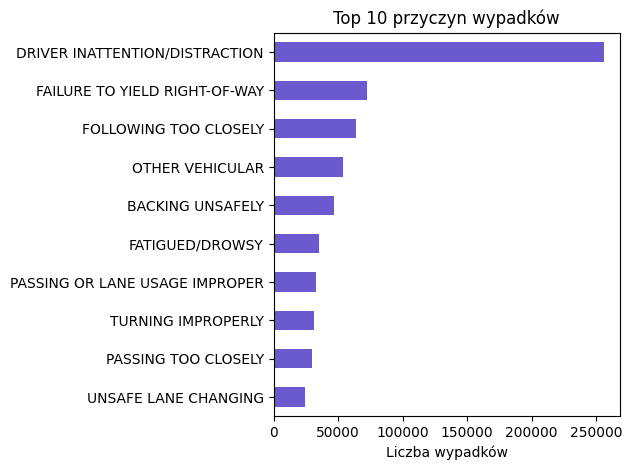

In [103]:
Factor_columns = [
    'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5'
]

# Wartości do wykluczenia
Excluded_factors = {"", "UNSPECIFIED", "OTHER", "UNKNOWN", "UNKNOW"}

# Łączenie i czyszczenie przyczyn wypadków
All_factors_sr = pd.concat([
    Accidents_cleaned_gdf[col].dropna().str.upper().loc[
        lambda x: ~x.isin(Excluded_factors)
    ]
    for col in Factor_columns
])

# Top 10 przyczyn
Top_factors_sr = All_factors_sr.value_counts().head(10)

# Wykres poziomy z największymi wartościami na górze
Top_factors_sr.iloc[::-1].plot(
    kind='barh',
    color='slateblue',
    title='Top 10 przyczyn wypadków'
)
plt.xlabel('Liczba wypadków')
plt.tight_layout()
plt.show()

### 💀 **5.5 Przyczyny najniebezpieczniejszych wypadków**

Należy ocenić "groźność wypadków" związanych z poszczególnymi przyczynami.
W analizie poniżej zostało to wykonane w dwóch podejściach:
1. poprzez zsumowanie liczby ofiar (zabitych i rannych) dla każdej przyczyny,
2. tylko z uwzględnieniem liczby osób, które zginęły w wypadkach,

dla któych wyniki zestawiono poniżej.

In [106]:
#df.groupby(["BOROUGH", "CONTRIBUTING FACTOR VEHICLE"])["NUMBER OF PERSONS KILLED"].sum().sort_values(["BOROUGH", "CONTRIBUTING FACTOR VEHICLE"],ascending=[True, False])

#### 5.5.1 Trzy główne przyczyny najgroźniejszych wypadków w Nowym Jorku

##### 5.5.1.1 Uwzględnienie liczby zabitych i rannych

In [109]:
# Dodanie nowej kolumny z całkowitą liczbą ofiar (zabici + ranni)
Factors_df["TOTAL VICTIMS"] = Factors_df["NUMBER OF PERSONS KILLED"] + Factors_df["NUMBER OF PERSONS INJURED"]

# Zgrupowanie po przyczynie wypadku i zsumowanie liczby ofiar
grouped = Factors_df.groupby("CONTRIBUTING FACTOR VEHICLE")["TOTAL VICTIMS"].sum()

# Posortowanie malejąco i wybranie trzech najważniejszych przyczyn
Top_3_factors_of_most_dangerous_accidents_sr = grouped.sort_values(ascending=False).head(3)

Top_3_factors_of_most_dangerous_accidents_df = pd.DataFrame(Top_3_factors_of_most_dangerous_accidents_sr)
Top_3_factors_of_most_dangerous_accidents_df

,TOTAL VICTIMS
CONTRIBUTING FACTOR VEHICLE,
Driver Inattention/Distraction,71039
Failure to Yield Right-of-Way,31566
Following Too Closely,21825


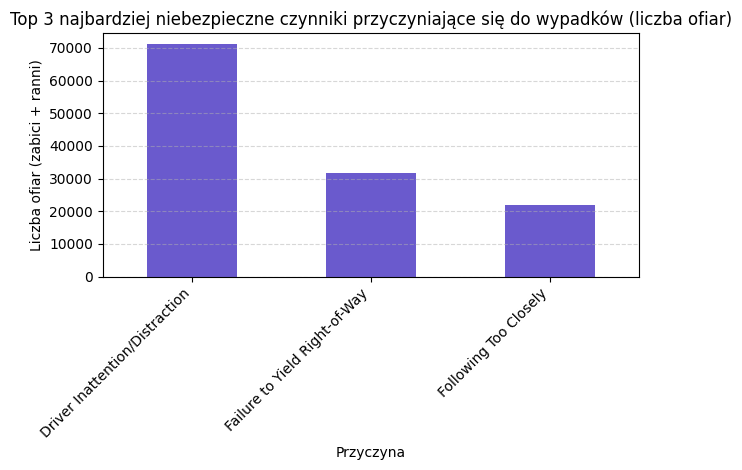

In [110]:
# Wykres pionowy dla 3 głównych przyczyn najbardziej niebezpiecznych wypadków
Top_3_factors_of_most_dangerous_accidents_sr.plot(
    kind="bar",
    color="slateblue",
    title="Top 3 najbardziej niebezpieczne czynniki przyczyniające się do wypadków (liczba ofiar)"
)

# Opis osi
plt.ylabel("Liczba ofiar (zabici + ranni)")
plt.xlabel("Przyczyna")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=45, ha='right')  # rotacja etykiet
plt.tight_layout()
plt.show()

##### 5.5.1.2 Uwzględnienie tylko liczby zabitych jako wskazanie na najgroźniejsze wypadki

In [112]:
Top_3_factors_of_most_dangerous_accidents_df = (
    Factors_df.groupby('CONTRIBUTING FACTOR VEHICLE')['NUMBER OF PERSONS KILLED']
      .sum()
      .reset_index()
      .sort_values('NUMBER OF PERSONS KILLED', ascending=False)
      .head(3)
)

# Najbardziej śmiertelna przyczyna (jedna)
Top_3_factors_of_most_dangerous_accidents_df.set_index("CONTRIBUTING FACTOR VEHICLE")

,NUMBER OF PERSONS KILLED
CONTRIBUTING FACTOR VEHICLE,
Driver Inattention/Distraction,179
Failure to Yield Right-of-Way,128
Traffic Control Disregarded,118


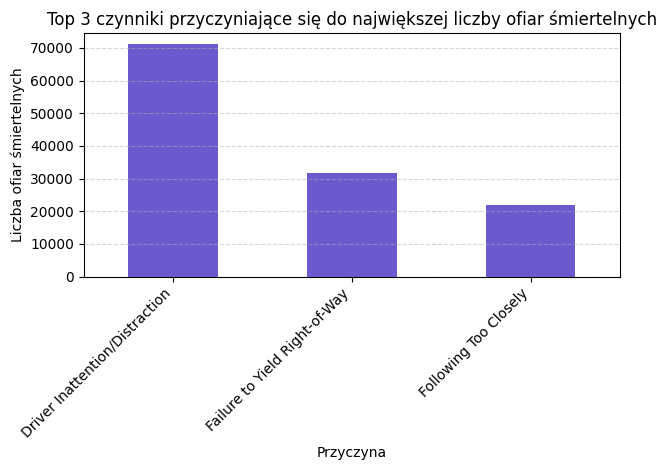

In [113]:
# Wykres pionowy
Top_3_factors_of_most_dangerous_accidents_sr.plot(
    kind="bar",
    color="slateblue",
    title="Top 3 czynniki przyczyniające się do największej liczby ofiar śmiertelnych"
)

# Opis osi
plt.ylabel("Liczba ofiar śmiertelnych")
plt.xlabel("Przyczyna")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=45, ha='right')  # rotacja etykiet
plt.tight_layout()
plt.show()


#### 5.5.2 Przyczyny najniebezpieczniejszych wypadków w każdej z dzielnic Nowego Jorku

Za najgroźniejsze wypadki zostały uznane te, w których zginęło najwięcej osób. W analizie zostały wskazane pyrzyczyny, które spowodowały wypadki, w wyniku których zginęło łącznie najwięcej osób.

In [116]:
Top_3_factors_of_most_dangerous_accidents_in_borough_df = (
    Factors_df.groupby(['BOROUGH', 'CONTRIBUTING FACTOR VEHICLE'])['NUMBER OF PERSONS KILLED']
      .sum()
      .reset_index()
)

# wybór dla każdej dzielnicy przyczyny, która spowodowała wypadki z największą liczbą zabitych
Top_3_factors_of_most_dangerous_accidents_in_borough_df = Top_3_factors_of_most_dangerous_accidents_in_borough_df.sort_values(['BOROUGH', 'NUMBER OF PERSONS KILLED'], ascending=[True, False])
Top_3_factors_of_most_dangerous_accidents_in_borough_df = Top_3_factors_of_most_dangerous_accidents_in_borough_df.groupby('BOROUGH').head(3)
Top_3_factors_of_most_dangerous_accidents_in_borough_df.set_index("BOROUGH")

,CONTRIBUTING FACTOR VEHICLE,NUMBER OF PERSONS KILLED
BOROUGH,,
BRONX,Driver Inattention/Distraction,31
BRONX,Unsafe Speed,18
BRONX,Traffic Control Disregarded,16
BROOKLYN,Driver Inattention/Distraction,55
BROOKLYN,Traffic Control Disregarded,40
BROOKLYN,Failure to Yield Right-of-Way,38
MANHATTAN,Driver Inattention/Distraction,36
MANHATTAN,Failure to Yield Right-of-Way,31
MANHATTAN,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,15


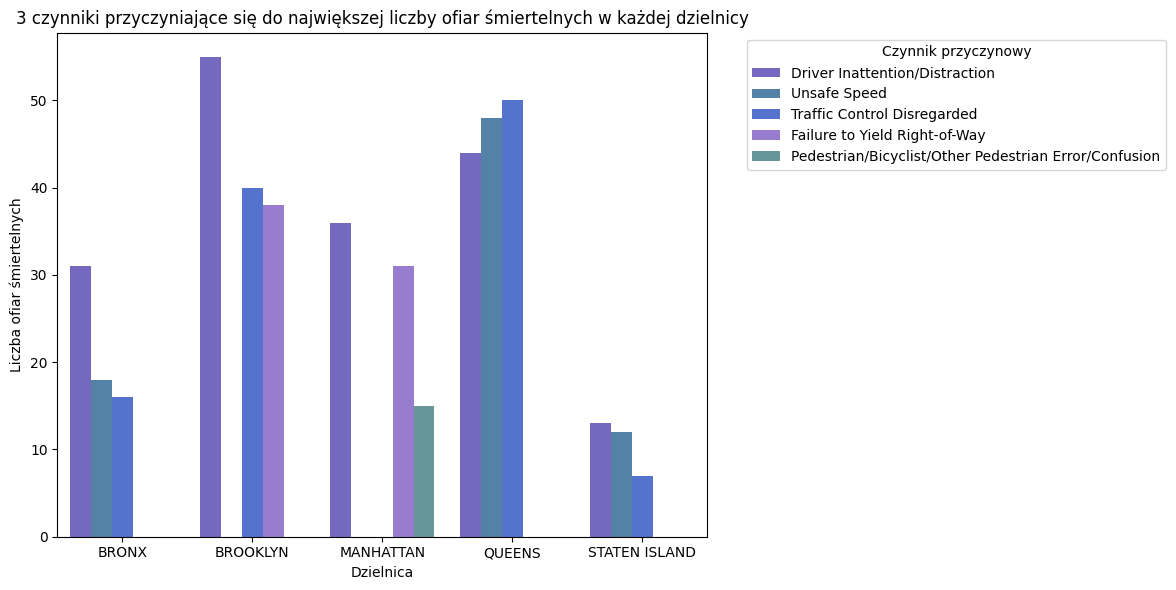

In [117]:
# Wizualizacja 3 przyczyn najniebezpieczniejszych wypadków w podziale na dzielnice

# Paleta kolorów
custom_colors = [
    "#6A5ACD",  # slateblue
    "#4682B4",  # steelblue
    "#4169E1",  # royalblue
    "#9370DB",  # mediumpurple
    "#5F9EA0",  # cadetblue
    "#7B68EE",  # mediumslateblue
    "#6495ED",  # cornflowerblue
    "#8A2BE2",  # blueviolet
    "#708090"   # slategray
]

# Ustalenie unikalnych czynników
unique_factors = Top_3_factors_of_most_dangerous_accidents_in_borough_df["CONTRIBUTING FACTOR VEHICLE"].unique()

# Dopasowanie palety (cyklicznie, jeśli jest więcej czynników niż kolorów)
custom_palette = dict(zip(unique_factors, custom_colors[:len(unique_factors)]))

# Wykres
plt.figure(figsize=(12, 6))
sns.barplot(
    data=Top_3_factors_of_most_dangerous_accidents_in_borough_df,
    x="BOROUGH",
    y="NUMBER OF PERSONS KILLED",
    hue="CONTRIBUTING FACTOR VEHICLE",
    palette=custom_palette
)

plt.title("3 czynniki przyczyniające się do największej liczby ofiar śmiertelnych w każdej dzielnicy")
plt.xlabel("Dzielnica")
plt.ylabel("Liczba ofiar śmiertelnych")
plt.legend(title="Czynnik przyczynowy", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### 5.5.3 Liczba zgonów oraz obrażeń spowodowanych przez szybką jazdę w danej dzielnicy

In [119]:
# Przygotowanie danych

# Lista przyczyn niebezpiecznej jazdy
#Dangerous_factors_ls = ["Unsafe Speed", "Aggressive Driving/Road Rage"]
Dangerous_factors_ls = ["Unsafe Speed"]

# Sumy ofiar w każdej dzielnicy – wszystkie przyczyny
Total_victims_df = Factors_df.groupby("BOROUGH")[["NUMBER OF PERSONS KILLED", "NUMBER OF PERSONS INJURED"]].sum()

# Filtrowanie niebezpiecznych przyczyn
Dangerous_victims_df = Factors_df[Factors_df["CONTRIBUTING FACTOR VEHICLE"].isin(Dangerous_factors_ls)]
Dangerous_victims_df = Dangerous_victims_df.groupby("BOROUGH")[["NUMBER OF PERSONS KILLED", "NUMBER OF PERSONS INJURED"]].sum()

# Główny DataFrame wynikowy
Consequences_of_unsafe_speeds_df = Dangerous_victims_df.copy()

# Obliczenie procentów (Series)
Percent_killed_sr = (Dangerous_victims_df["NUMBER OF PERSONS KILLED"] / Total_victims_df["NUMBER OF PERSONS KILLED"] * 100).round(2)
Percent_injured_sr = (Dangerous_victims_df["NUMBER OF PERSONS INJURED"] / Total_victims_df["NUMBER OF PERSONS INJURED"] * 100).round(2)

# Dodanie ich do DataFrame
Consequences_of_unsafe_speeds_df["PERCENT_KILLED"] = Percent_killed_sr
Consequences_of_unsafe_speeds_df["PERCENT_INJURED"] = Percent_injured_sr

# Formatowanie do tekstu: liczba (procent)
Consequences_of_unsafe_speeds_df["KILLED (PERCENT)"] = (
    Dangerous_victims_df["NUMBER OF PERSONS KILLED"].astype(int).astype(str) +
    " (" + Percent_killed_sr.astype(str) + "%)"
)

Consequences_of_unsafe_speeds_df["INJURED (PERCENT)"] = (
    Dangerous_victims_df["NUMBER OF PERSONS INJURED"].astype(int).astype(str) +
    " (" + Percent_injured_sr.astype(str) + "%)"
)

# Do prezentacji
Formatted_consequences_df = Consequences_of_unsafe_speeds_df[[
    "KILLED (PERCENT)",
    "INJURED (PERCENT)"
]]

Formatted_consequences_df

,KILLED (PERCENT),INJURED (PERCENT)
BOROUGH,,
BRONX,18 (12.08%),1629 (4.13%)
BROOKLYN,24 (9.38%),2216 (3.07%)
MANHATTAN,11 (6.83%),791 (1.9%)
QUEENS,48 (17.33%),2423 (3.28%)
STATEN ISLAND,12 (21.43%),444 (3.83%)


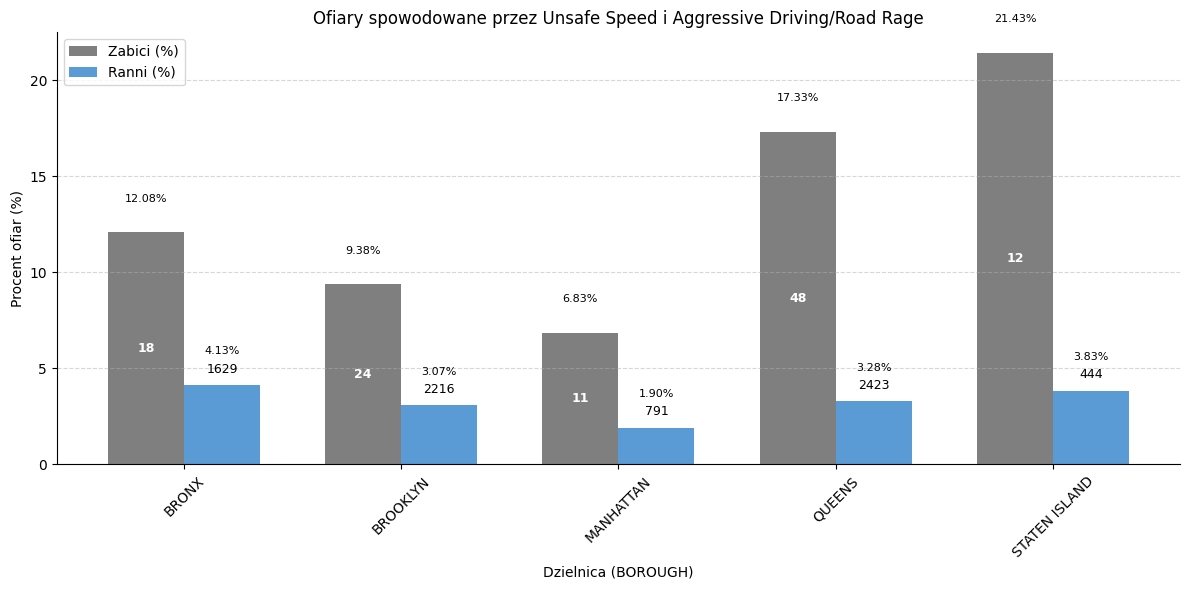

In [120]:
# Wykres z wartościami procentowymi i liczbowymi

# Przygotowanie danych
Boroughs_ls = Consequences_of_unsafe_speeds_df.index.tolist()
x_pos = np.arange(len(Boroughs_ls))
bar_width = 0.35

# Liczby
Killed_counts_sr = Dangerous_victims_df["NUMBER OF PERSONS KILLED"]
Injured_counts_sr = Dangerous_victims_df["NUMBER OF PERSONS INJURED"]

# Procenty
Percent_killed_sr = Consequences_of_unsafe_speeds_df["PERCENT_KILLED"]
Percent_injured_sr = Consequences_of_unsafe_speeds_df["PERCENT_INJURED"]

# Wykres
fig, ax = plt.subplots(figsize=(12, 6))

bars_killed = ax.bar(x_pos - bar_width/2, Percent_killed_sr, width=bar_width,
                     label="Zabici (%)", color="#7f7f7f")  # szary

bars_injured = ax.bar(x_pos + bar_width/2, Percent_injured_sr, width=bar_width,
                      label="Ranni (%)", color="#5b9bd5")  # stonowany niebieski

# Etykiety: liczba wewnątrz, procent nad
def add_labels(bars, counts_sr):
    for i, bar in enumerate(bars):
        height = bar.get_height()
        count = counts_sr.iloc[i]
        # Wewnątrz
        if height >= 5:
            ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{int(count)}',
                    ha='center', va='center', fontsize=9, color='white', fontweight='bold')
        else:
            ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(count)}',
                    ha='center', va='bottom', fontsize=9, color='black')
        # Nad
        ax.text(bar.get_x() + bar.get_width() / 2, height + 1.5, f'{height:.2f}%',
                ha='center', va='bottom', fontsize=8, color='black')

add_labels(bars_killed, Killed_counts_sr)
add_labels(bars_injured, Injured_counts_sr)

# Oś i estetyka
ax.set_xticks(x_pos)
ax.set_xticklabels(Boroughs_ls, rotation=45)
ax.set_xlabel("Dzielnica (BOROUGH)")
ax.set_ylabel("Procent ofiar (%)")
ax.set_title("Ofiary spowodowane przez Unsafe Speed i Aggressive Driving/Road Rage")
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### ❓ **5.6 Wypadki bez wskazanej przyczyny**

In [122]:
# Lista kolumn z przyczynami
factor_columns_ls = [
    "CONTRIBUTING FACTOR VEHICLE 1",
    "CONTRIBUTING FACTOR VEHICLE 2",
    "CONTRIBUTING FACTOR VEHICLE 3",
    "CONTRIBUTING FACTOR VEHICLE 4",
    "CONTRIBUTING FACTOR VEHICLE 5",
]

# Filtr: wszystkie kolumny są puste lub mają wartość 'Unspecified' (ignorujemy wielkość liter i spacje)
no_factor_mask = Corrected_data_df[factor_columns_ls].apply(
    lambda row: all(
        pd.isna(val) or str(val).strip().upper() == "UNSPECIFIED"
        for val in row
    ),
    axis=1
)

# Liczba takich wierszy (czyli liczba wypadków bez określonej przyczyny)
number_of_accidents_with_no_factors = no_factor_mask.sum()

total_accidents = len(Corrected_data_df)
percent = (number_of_accidents_with_no_factors / total_accidents * 100).round(2)

print(f"Liczba wypadków bez określonej przyczyny: {number_of_accidents_with_no_factors}")
print(f"Udział procentowy: {percent}%")


Liczba wypadków bez określonej przyczyny: 444613
Udział procentowy: 36.5%


## 📊 **6. Wnioski z przeprowadzonej analizy**
---

Na podstawie przeprowadzonej analizy danych o wypadkach drogowych w Nowym Jorku można sformułować następujące kluczowe wnioski:

---

### 🚗 Główne przyczyny wypadków
- Najczęściej powtarzające się przyczyny wypadków to:
  - *Driver Inattention/Distraction* (nieuwaga lub rozproszenie kierowcy),
  - *Failure to Yield Right-of-Way* (nieustąpienie pierwszeństwa przejazdu),
  - *Following Too Closely* (jazda „na zderzaku”).
- Powyższe czynniki mają charakter systemowy – występują w każdej dzielnicy, niezależnie od zagęszczenia ruchu.
- Ponad **85%** przyczyn wypadków leży po stronie kierowców.

---

### 🏙️ Zróżnicowanie przestrzenne (dzielnice)
- **Bezwzględnie** najwięcej wypadków odnotowano w:
  - Brooklyn,
  - Queens,
  - Bronx.
- Jednak po uwzględnieniu **powierzchni dzielnic** (normalizacja na km²), perspektywa się zmienia:
  - Największe zagęszczenie wypadków odnotowano na **Manhattanie**, który – mimo mniejszej powierzchni – ma intensywny ruch pieszy i samochodowy.
  - **Bronx** i **Brooklyn** również mają wysokie wartości, co wskazuje na potrzebę zróżnicowanej interwencji w zależności od charakterystyki dzielnicy.

---

### 📍 Najniebezpieczniejsze lokalizacje
- Mapa punktowa i agregacja danych wykazały skupiska wypadków w:
  - rejonie dolnego i środkowego Manhattanu,
  - przy głównych arteriach w Brooklynie (m.in. Atlantic Ave, Flatbush Ave),
  - w okolicach Queens Blvd („Boulevard of Death”).
- Te lokalizacje łączą intensywny ruch samochodowy z dużą liczbą pieszych – szczególnie narażonych na kolizje.

---

### 🕒 Wnioski czasowe
- Najwięcej wypadków ma miejsce w godzinach szczytu, zwłaszcza między **15:00** a **18:00**.
- W ujęciu tygodniowym:
  - **Piątki** to dni o największym zagrożeniu,
  - **Niedziele** – relatywnie najmniej wypadków, co może być efektem mniejszego natężenia ruchu.

---

### 🚑 Najniebezpieczniejsze przyczyny (pod względem ofiar)
- Przyczyny odpowiadające za największą liczbę wszystkich ofiar (rannych + zabitych):
  - *Driver Inattention/Distraction*,
  - *Failure to Yield Right-of-Way*,
  - *Unsafe Speed*.
- Przyczyny związane z największą liczbą **ofiar śmiertelnych**:
  - *Unsafe Speed*,
  - *Alcohol Involvement* (jazda pod wpływem alkoholu),
  - *Traffic Control Disregarded* (zlekceważenie sygnalizacji lub znaków drogowych).

---

### 🧭 Rekomendacje
- **Edukacja kierowców**: kampanie uświadamiające dotyczące ryzyka rozproszenia uwagi i nieustąpienia pierwszeństwa.
- **Egzekwowanie przepisów**:
  - większe kontrole prędkości i trzeźwości,
  - monitoring w rejonach skrzyżowań.
- **Inwestycje infrastrukturalne**:
  - poprawa widoczności i oznakowania na niebezpiecznych skrzyżowaniach,
  - przebudowa infrastruktury w lokalizacjach z wysokim zagęszczeniem wypadków (np. Queens Blvd).
- **Podejście przestrzenne**:
  - Zamiast skupiać się jedynie na ogólnej liczbie wypadków w dzielnicach, uwzględniać **gęstość wypadków na jednostkę powierzchni**, by lepiej identyfikować miejsca wymagające interwencji.


---

🧠 **Podsumowanie**: Wnioski wskazują na konieczność kompleksowego podejścia do bezpieczeństwa drogowego, uwzględniającego aspekty przestrzenne, czasowe oraz charakter zdarzeń.